# Project - Credit Card Users Churn Prediction
---

## Context:

- The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

- Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

## Objective:

- The objective is to analyze the customers' data and information to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards.

- Following are the Key questions to be solved: 

    1. Identify the customers who will leave their credit card services from bank.
    2. Possible reasons for leaving.


## Data Information

The records contain the Customer's personal information and their travel details & patterns. It also contains Customer interaction information during their sales pitch and their learnings from those sales discussions. 

The detailed data dictionary is given below:

**Customer Details**

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent


---

<a id="summary_home"></a>
## Table of Contents (TOC)


##### - *[Importing Packages](#import)*

##### - *[Unwrapping Customer Information](#unwrap)*
- *[Data Description](#datadesc)*

##### - *[Data Pre-Processing & Sanity Checks](#preprocess)*

##### - *[Summary of Data Analysis](#dataanalysis1)*

##### - *[EDA Analysis](#edaanalysis)*
- *[Insights from Categorical Data](#inCategory1)*
- *[Insights from Numerical Data](#inNumber1)*
- *[Univariate Analysis](#UnivariateAnalysis1)*
	- Summary provided under each feature chart
- *[Bivariate Analysis](#bivariate)*
    - *[Categorical Data vs ProductTaken Summary](#BivariateCat)*
    - *[Numerical Data vs ProductTaken Summary](#BivariateNum)*
- *[Correlation Summary](#BivariateAnalysis1)*
- *[Multivariate Analysis](#multivariate)*    

##### - *[Model Building](#model)*
- *[Data preparation for Modeling](#prepmodel)*
- *[Model evaluation criterion](#evaluation1)*

##### - *[Model Analysis - Original Data](#modelorgdata)*

##### - *[Model Analysis - Oversampling data](#modeloverdata)*

##### - *[Model Analysis - Undersampling data](#modelunderdata)*

##### - *[Comparison Models with Data - Original vs Oversample vs Undersample ](#modelcomp)*
- *[AdaBoost - Grid vs Random](#adaboost)*
- *[Gradient - Grid vs Random](#gradient)*
- *[XGBoost - Grid vs Random](#xgboost)*

##### - *[Model Performance on Test dataset](#mptest)*

##### - *[Pipelines for productionizing the model ](#pipeline)*

##### - *[Recommendations](#recommend1)*


---

<a id='import'> </a>

## Importing required Packages: 
*[Click to return to TOC](#summary_home)*

---

In [390]:
# Importing the Python Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
from IPython.display import Image

# Importing libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Used for Ignore warnings. When we generate the output, then we can use this ignore warning
import warnings

warnings.filterwarnings("ignore")

# To be used for missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# this will help in making the Python code more structured automatically (good coding practice)
!pip install nb-black
%reload_ext nb_black

# Command to tell Python to actually display the graphs
%matplotlib inline

# let's start by installing plotly
!pip install plotly

# importing plotly
import plotly.express as px


# Command to hide the 'already satisfied' warnining from displaying
%pip install keras | grep -v 'already satisfied'

# Constant for making bold text
boldText = "\033[1m"

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 500)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to build Bagging model
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# to build Boosting model
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option("mode.chained_assignment", None)

# To build model for prediction
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Install library using
# In jupyter notebook
# !pip install shap

# or
# In anaconda command prompt
# conda install -c conda-forge shap - in conda prompt
import shap


Note: you may need to restart the kernel to use updated packages.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [391]:
# Loading Used Cars Dataset
df = pd.read_csv("../Dataset/BankChurners.csv")

# same random results every time
np.random.seed(1)
df.sample(n=10)

# To copy the data to another object
custData = df.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

<a id='unwrap'> </a>

## Unwrapping the Customer Information: 
*[Click to return to TOC](#summary_home)*

---

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [393]:
# Command to understand the total number of data collected
print(
    f"- There are {df.shape[0]} row samples and {df.shape[1]} attributes of the customer information collected in this dataset."
)

- There are 10127 row samples and 21 attributes of the customer information collected in this dataset.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [394]:
df.head(5)  # Displaying the fist 10 rows of the Dataset

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [395]:
df.tail(5)  # Displaying the last 10 rows of the Dataset

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [396]:
df.describe(include="all").T

count unique                top  freq  \
CLIENTNUM                 10127.0    NaN                NaN   NaN   
Attrition_Flag              10127      2  Existing Customer  8500   
Customer_Age              10127.0    NaN                NaN   NaN   
Gender                      10127      2                  F  5358   
Dependent_count           10127.0    NaN                NaN   NaN   
Education_Level              8608      6           Graduate  3128   
Marital_Status               9378      3            Married  4687   
Income_Category             10127      6     Less than $40K  3561   
Card_Category               10127      4               Blue  9436   
Months_on_book            10127.0    NaN                NaN   NaN   
Total_Relationship_Count  10127.0    NaN                NaN   NaN   
Months_Inactive_12_mon    10127.0    NaN                NaN   NaN   
Contacts_Count_12_mon     10127.0    NaN                NaN   NaN   
Credit_Limit              10127.0    NaN                NaN   NaN   
Total_Revolving_Bal       10127.0    NaN                NaN   NaN   
Avg_Open_To_Buy           10127.0    NaN                NaN   NaN   
Total_Amt_Chng_Q4_Q1      10127.0    NaN                NaN   NaN   
Total_Trans_Amt           10127.0    NaN                NaN   NaN   
Total_Trans_Ct            10127.0    NaN                NaN   NaN   
Total_Ct_Chng_Q4_Q1       10127.0    NaN                NaN   NaN   
Avg_Utilization_Ratio     10127.0    NaN                NaN   NaN   

                                      mean              std          min  \
CLIENTNUM                 739177606.333663  36903783.450231  708082083.0   
Attrition_Flag                         NaN              NaN          NaN   
Customer_Age                      46.32596         8.016814         26.0   
Gender                                 NaN              NaN          NaN   
Dependent_count                   2.346203         1.298908          0.0   
Education_Level                        NaN              NaN          NaN   
Marital_Status                         NaN              NaN          NaN   
Income_Category                        NaN              NaN          NaN   
Card_Category                          NaN              NaN          NaN   
Months_on_book                   35.928409         7.986416         13.0   
Total_Relationship_Count           3.81258         1.554408          1.0   
Months_Inactive_12_mon            2.341167         1.010622          0.0   
Contacts_Count_12_mon             2.455317         1.106225          0.0   
Credit_Limit                   8631.953698       9088.77665       1438.3   
Total_Revolving_Bal            1162.814061       814.987335          0.0   
Avg_Open_To_Buy                7469.139637      9090.685324          3.0   
Total_Amt_Chng_Q4_Q1              0.759941         0.219207          0.0   
Total_Trans_Amt                4404.086304      3397.129254        510.0   
Total_Trans_Ct                   64.858695         23.47257         10.0   
Total_Ct_Chng_Q4_Q1               0.712222         0.238086          0.0   
Avg_Utilization_Ratio             0.274894         0.275691          0.0   

                                  25%          50%          75%          max  
CLIENTNUM                 713036770.5  717926358.0  773143533.0  828343083.0  
Attrition_Flag                    NaN          NaN          NaN          NaN  
Customer_Age                     41.0         46.0         52.0         73.0  
Gender                            NaN          NaN          NaN          NaN  
Dependent_count                   1.0          2.0          3.0          5.0  
Education_Level                   NaN          NaN          NaN          NaN  
Marital_Status                    NaN          NaN          NaN          NaN  
Income_Category                   NaN          NaN          NaN          NaN  
Card_Category                     NaN          NaN          NaN          NaN  
Months_on_book                   31.0         

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

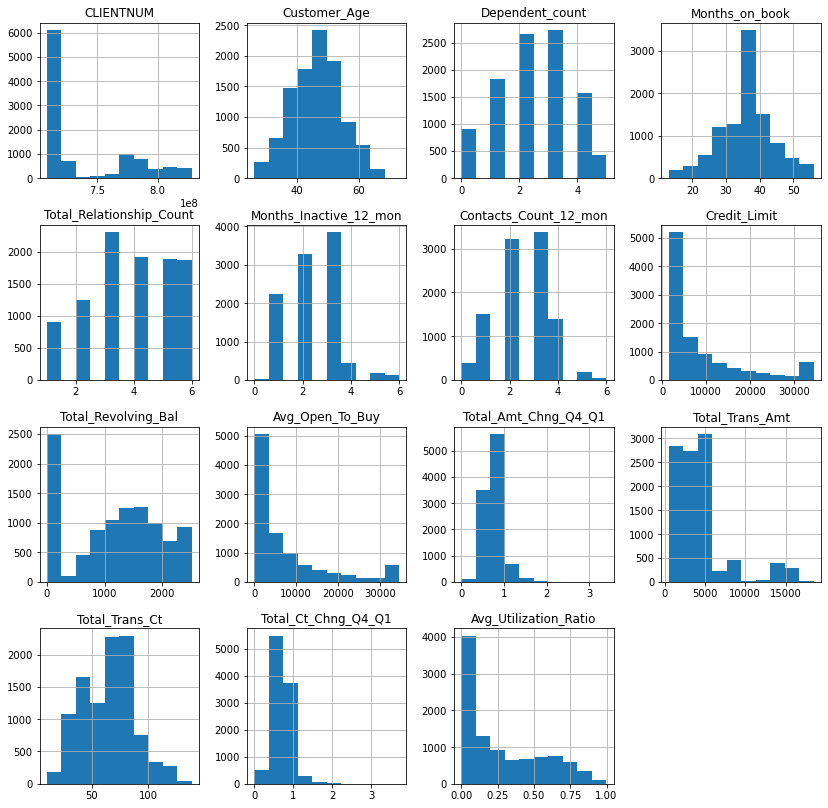

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [397]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

<a id="datadesc"> </a>

**Data Description:**  *[Click to return to TOC](#summary_home)*


* `CLIENTNUM` - There are 10127 samples of customers that has been provided in the dataset.
* **`Attrition_Flag`** - There are two unique values - "Existing Customer" & "Attrited Customer". The "Existing Customer" has the most number of occurences. This will be the Target variable for analysing the model
* `Customer_Age` - Age of customers range from 26 - 73 years, with 50% of the customers of the age of 46. The data seems to be uniformly distributed based on the histo chart
* `Gender` - There are 2 unique values with F being the most occurences. 
* `Dependent Count` - The dependent counts varies from 0 - 5.  This column can be treated as a category type
* `Education Level` - There are 6 types of unique values with "Graduate" being the most occurence. There are missing values which needs to be treated. This column can be treated as a category type
* `Marital Status` - There are 3 types of unique values with "Married" bring the most occurence. There are missing values which needs to be treated.This column can be treated as a category type
* `Income Category` - There are 6 unique values observed with "Less than 40K" has the frequent occurence. This column can betreated as a category type
* `Card Category` - There are 4 unique values observed with "Blue" card has the frequent occurence. This column can be treated as a category type
* `Months_on_book` - On an average the customers have been associated with the back for 36 months and ranging between 13 - 56 months. The data seems to be uniformly distributed based on the histo chart
* `Total_Relationship_Count` - On an average customers are holding 4 products. Mean & Median are almost the same. Min is 1 and Max of 6 products. This column can be treated as a Category type 
* `Months_Inactive_12_mon & Contacts_Count_12_mon` - On an average, 50% of the customers are inactive for almost 2 months with a max inactivity of 6 months. These columns can be treated as a Category type
* `Credit_Limit` - Customers hold an average credit limit of 8632 while 50% of the customers have 4549 as their creidt limit. The Mean & Median are in the extremes. Min credit limit is 1438 & max is 34516. Need to check for outliers
* `Total_Revolving_Bal` - On an average, customers maintain a revolving balance of 1163 while 50% of them have 1276. Max balance observed is 2517
* `Avg_Open_To_Buy` - Customers maintain an average of 7469 amount left in card while 50% of the customers have 3474 as their balance. The Mean & Median are in the extremes. Min credit limit is 1438 & max is 34516. Need to check for outliers
* `Total_Amt_Chng_Q4_Q1` - Ratio of the total transaction count between Q4 & Q1 is at an average of 0.76 with a min of 0 to 3.4
* `Total_Ct_Chng_Q4_Q1` - Ratio of the total transaction count between Q4 & Q1 is at an average of 0.7 with a min of 0 to 3.7
* `Total_Trans_Amt` - Total transaction amounts range between 510 - 18484 with an average of 4404 over the course of 12 months
* `Total_Trans_Ct` - Total transaction count range between 10 - 139 transactions, with an average of 64 transaction in 12 months
* `Avg_Utilization_Ratio` - The average utlization ratio is around 0.27 with sum not utlizing the credit and having a min ratio value of 0 to max of 0.99 completly utlizing it


---

<a id="preprocess"> </a>

## Data Preprocessing & Sanity Checks
*[Click to return to TOC](#summary_home)*

---

In [398]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

- We can drop the column - `CLIENTNUM` as it is unique for each customer and will not add value to the model
- Most of the variables with single digit unique values can be consided for categorical types while the remaining can be validated for numerical values. 

#### Dropping the Customer ID Column

In [399]:
# Dropping the 'ID' columns since its not required
df.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Checking for Duplicates 

In [400]:
# Checking for duplicated rows in the dataset
duplicateSum = df.duplicated().sum()
print("**Inferences:**")
if duplicateSum > 0:
    print(f"- There are {str(duplicateSum)} duplicated row(s) in the dataset")
    # Removing the duplicated rows in the dataset
    df.drop_duplicates(inplace=True)
    print(
        f"- There are {str(df.duplicated().sum())} duplicated row(s) in the dataset post cleaning"
    )
    df.duplicated().sum()
    # resetting the index of data frame since some rows will be removed
    df.reset_index(drop=True, inplace=True)
else:
    print("- There are no duplicated row(s) in the dataset")

**Inferences:**
- There are no duplicated row(s) in the dataset


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Checking for Columns with missing values

In [401]:
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

- There are missing values in `Education Level` & `Marital Status` which needs to be treated
- The remaining columns do not have missing values, but we need to check the values for possible incorrect data

#### Validating the values of the columns to observe the pattern and data correctness

In [402]:
# printing the number of occurrences of each unique value in each categorical column
num_to_display = 10
for column in df.describe(include="all").columns:
    val_counts = df[column].value_counts(
        dropna=False
    )  # Kept dropNA to False to see the NA value count as well
    print("Unique values in", column, "are :")
    print(val_counts.iloc[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")

    print("-" * 50)
    print(" ")


Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
 
Unique values in Customer_Age are :
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
Name: Customer_Age, dtype: int64
Only displaying first 10 of 45 values.
--------------------------------------------------
 
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
 
Unique values in Dependent_count are :
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
--------------------------------------------------
 
Unique values in Education_Level are :
Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id='valueobserve'></a>

**Observations:**

*[Click to return to TOC](#summary_home)*

* `Attrition Flag` - There are 2 unique values - "Exisiting" & "Attrited" Customers
* `Customer Age` - It's a continuos data and can be consdiered for int type
* `Gender` - There are 2 unique values - 'M' & 'F'. 
* `Dependent Count` - Uniue range values from 0-6. Feature can be considered for Category type
* `Education level` - There are 6 unique values with few NaN. Missing values to be treated. Feature can be considered for Category type
* `Maritial Status` - There are 3 unique values - "Married", "Divorced" & "Single" Customers. Missing values to be treated. Feature can be considered for Category type
* `Income Category` - There are 5 unique types. One of the type is "abc" which is incorrect. Need to be treated for NaN and missing values to be treated. Feature can be considered for Category type
* `Card Category` - There are 4 unique values and this fature can be considered as a category
* `Months on Book` - It's a continuos data and can be consdiered for int type
* `Total Relationship ` - There are 6 definite values. It can be considered for category type
* `Months_Inactive_12_mon ` - There are 7 definite values. There is one 0 value. It could be a missing value or possibly an active card on all months. It can be considered for category type
* `Contacts_Count_12_mon ` - There are 7 definite values. There is one 0 value. It could be a missing value or possibly an active card on all months. It can be considered for category type
* The remaining columns are of continuos data and can be consdiered for int/float types as appropriate

**Inferences:**

- Based on the above observations & values, we will update the features with categorical type values to Category type

In [403]:
df["Attrition_Flag"] = df["Attrition_Flag"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["Dependent_count"] = df["Dependent_count"].astype("category")
df["Education_Level"] = df["Education_Level"].astype("category")
df["Marital_Status"] = df["Marital_Status"].astype("category")
df["Income_Category"] = df["Income_Category"].astype("category")
df["Card_Category"] = df["Card_Category"].astype("category")
df["Total_Relationship_Count"] = df["Total_Relationship_Count"].astype("category")
df["Months_Inactive_12_mon"] = df["Months_Inactive_12_mon"].astype("category")
df["Contacts_Count_12_mon"] = df["Contacts_Count_12_mon"].astype("category")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Replacing the incorrect value for Income Category type

In [404]:
# The incorrect type in Income ccategory is replaced with NaN and will be addressed as part of missing values
df.Income_Category = df.Income_Category.replace("abc", np.nan)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Replacing the Attrition Flag text to binary

In [405]:
# Replacing the text values of the Target Variable with 0 (Existing) & 1 (Attrition)
att_flag = {"Existing Customer": 0, "Attrited Customer": 1}
df["Attrition_Flag"] = df["Attrition_Flag"].map(att_flag)

#df.Attrition_Flag = df.Attrition_Flag.replace("Existing Customer", 0)
#df.Attrition_Flag = df.Attrition_Flag.replace("Attrited Customer", 1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [406]:
# Defining bins for splitting the age to groups and creating a new column to review the relationship
bins = [20, 30, 40, 50, 60, 70, 80]
labels = [
    "Less_than_30",
    "Less_than_40",
    "Less_than_50",
    "Less_than_60",
    "Less_than_70",
    "Less_than_80",
]
df["AgeGroup"] = pd.cut(df["Customer_Age"], bins=bins, labels=labels, right=False)
df["AgeGroup"] = df["AgeGroup"].astype("category")

df["AgeGroup"].value_counts(dropna=False)

Less_than_50    4561
Less_than_60    2998
Less_than_40    1841
Less_than_70     530
Less_than_30     195
Less_than_80       2
Name: AgeGroup, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [407]:
# Defining bins for splitting the relationship years to groups and creating a new column to review the relationship
bins = [0, 12, 24, 36, 48, 60, 72]
labels = [
    "Between_0-1_Year",
    "Between_1-2_Year",
    "Between_2-3_Year",
    "Between_3-4_Year",
    "Between_4-5_Year",
    "Between_5-6_Year",
]
df["Months_on_book_Grp"] = pd.cut(
    df["Months_on_book"], bins=bins, labels=labels, right=False
)
df["Months_on_book_Grp"] = df["Months_on_book_Grp"].astype("category")

df["Months_on_book_Grp"].value_counts(dropna=False)

Between_3-4_Year    5508
Between_2-3_Year    3115
Between_4-5_Year     817
Between_1-2_Year     687
Between_0-1_Year       0
Between_5-6_Year       0
Name: Months_on_book_Grp, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [408]:
# Defining bins for splitting the credit limits to groups and creating a new column to review the relationship
bins = [0, 5000, 10000, 15000, 20000, 25000, 40000]
labels = [
    "<5K",
    "Between_5K-10K",
    "Between_10K-15K",
    "Between_15K-20K",
    "Between_20K-25K",
    ">25K",
]
df["Credit_Limit_Grp"] = pd.cut(
    df["Credit_Limit"], bins=bins, labels=labels, right=False
)
df["Credit_Limit_Grp"] = df["Credit_Limit_Grp"].astype("category")

df["Credit_Limit_Grp"].value_counts(dropna=False)

<5K                5358
Between_5K-10K     2015
Between_10K-15K     941
>25K                892
Between_15K-20K     549
Between_20K-25K     372
Name: Credit_Limit_Grp, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [409]:
# Observing the data dictionery after the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [410]:
# Command to understand the total number of data collected
print(
    f"- There are {df.shape[0]} row samples and {df.shape[1]} attributes of the customer information collected in this dataset."
)

- There are 10127 row samples and 23 attributes of the customer information collected in this dataset.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [411]:
# Identofying the category columns
category_columnNames = df.describe(include=["category"]).columns
category_columnNames

Index(['Attrition_Flag', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'AgeGroup', 'Months_on_book_Grp',
       'Credit_Limit_Grp'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [412]:
# Identifying the numerical columns
number_columnNames = (
    df.describe(include=["int64"]).columns.tolist()
    + df.describe(include=["float64"]).columns.tolist()
)
number_columnNames

['Customer_Age',
 'Months_on_book',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Credit_Limit',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

In [413]:
df.describe(include="category").T

count unique               top  freq
Attrition_Flag            10127      2                 0  8500
Gender                    10127      2                 F  5358
Dependent_count           10127      6                 3  2732
Education_Level            8608      6          Graduate  3128
Marital_Status             9378      3           Married  4687
Income_Category            9015      5    Less than $40K  3561
Card_Category             10127      4              Blue  9436
Total_Relationship_Count  10127      6                 3  2305
Months_Inactive_12_mon    10127      7                 3  3846
Contacts_Count_12_mon     10127      7                 3  3380
AgeGroup                  10127      6      Less_than_50  4561
Months_on_book_Grp        10127      4  Between_3-4_Year  5508
Credit_Limit_Grp          10127      6               <5K  5358

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [414]:
df.describe().T

count         mean          std     min       25%  \
Customer_Age           10127.0    46.325960     8.016814    26.0    41.000   
Months_on_book         10127.0    35.928409     7.986416    13.0    31.000   
Credit_Limit           10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal    10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy        10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1   10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt        10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct         10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1    10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio  10127.0     0.274894     0.275691     0.0     0.023   

                            50%        75%        max  
Customer_Age             46.000     52.000     73.000  
Months_on_book           36.000     40.000     56.000  
Credit_Limit           4549.000  11067.500  34516.000  
Total_Revolving_Bal    1276.000   1784.000   2517.000  
Avg_Open_To_Buy        3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1      0.736      0.859      3.397  
Total_Trans_Amt        3899.000   4741.000  18484.000  
Total_Trans_Ct           67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1       0.702      0.818      3.714  
Avg_Utilization_Ratio     0.176      0.503      0.999

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id='dataanalysis1'></a>

### Summary of Data Analysis

*[Click to return to TOC](#summary_home)*

**Data Structure:**

* Dependent variable is the Attrition_Flag which is of categorical data type
* There were no duplicates. Dataset contains 10127 row samples and 21 attributes of information
* There are Category(11), float64(5), int64(5) features in the dataset

**Data Cleaning:**

* `Client Number` attribute is not required and the column was dropped
* Income category had incorrect values which was treated for NaN
* There are missing values in `Education_Level, Marital_Status & Income Category` features in the dataset and will be addressed during modeling
* Some of the columns with categorical values where converted to Category type

**Data Description:**
* Only 16% of the customers have left the bank and there are 84% existing customers
* Almost 50% of the customers are at the age of 46, with age ranging betweeen 26-73
* Most of the customers are Female. Customers are mostly "Married" and "Graduates". They at least hold 4 cards on an average  
* Most of the customers fall under the range of "Less than 40K" income
* On an average Customers hold 4 products and been with the back for 36 months
* Credit Limit of the customers are varying and also extreme. Need to check for outliers
* On an average, 50% of the customers are inactive for almost 2 months with a max inactivity of 6 months
* The average utlization ratio is around 0.27 with some not utlizing the credit and having a min ratio value of 0 to max of 0.99 completly utlizing it
* On an average, they make 64 transactions in a given year with an average transaction amount of 4,404
  
  
**For more details, *[Click here for Data descriptions](#datadesc)* &  *[Click here for Feature Value observations](#valueobserve)***
 

---

### Common Functions


In [415]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, hueCol=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 7))

    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        hue=hueCol,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
        # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [416]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True,).sort_values(
        by=sorter, ascending=False
    )
    print("-" * 30, " Volume ", "-" * 30)
    print(tab1)

    tab1 = pd.crosstab(
        data[predictor], data[target], margins=True, normalize="index"
    ).sort_values(by=sorter, ascending=False)
    print("-" * 30, " Percentage % ", "-" * 30)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [417]:
# Creating a common function to draw a Boxplot & a Histogram for each of the analysis
def histogram_boxplot(data, feature, figsize=(15, 7), kde=True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [418]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col, lower=0.25, upper=0.75, mul=1.5):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(lower)  # 25th quantile
    Q3 = df[col].quantile(upper)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - (mul * IQR)
    Upper_Whisker = Q3 + (mul * IQR)

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list, lower=0.25, upper=0.75, mul=1.5):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c, lower, upper, mul)

    return df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

<a id="edaanalysis"> </a>

## EDA Analysis - Analyzing respective attributes to understand the data pattern
*[Click to return to TOC](#summary_home)*

---

In [419]:
# Summary of data
df.describe(include="all").T

count unique               top    freq  \
Attrition_Flag            10127.0    2.0               0.0  8500.0   
Customer_Age              10127.0    NaN               NaN     NaN   
Gender                      10127      2                 F    5358   
Dependent_count           10127.0    6.0               3.0  2732.0   
Education_Level              8608      6          Graduate    3128   
Marital_Status               9378      3           Married    4687   
Income_Category              9015      5    Less than $40K    3561   
Card_Category               10127      4              Blue    9436   
Months_on_book            10127.0    NaN               NaN     NaN   
Total_Relationship_Count  10127.0    6.0               3.0  2305.0   
Months_Inactive_12_mon    10127.0    7.0               3.0  3846.0   
Contacts_Count_12_mon     10127.0    7.0               3.0  3380.0   
Credit_Limit              10127.0    NaN               NaN     NaN   
Total_Revolving_Bal       10127.0    NaN               NaN     NaN   
Avg_Open_To_Buy           10127.0    NaN               NaN     NaN   
Total_Amt_Chng_Q4_Q1      10127.0    NaN               NaN     NaN   
Total_Trans_Amt           10127.0    NaN               NaN     NaN   
Total_Trans_Ct            10127.0    NaN               NaN     NaN   
Total_Ct_Chng_Q4_Q1       10127.0    NaN               NaN     NaN   
Avg_Utilization_Ratio     10127.0    NaN               NaN     NaN   
AgeGroup                    10127      6      Less_than_50    4561   
Months_on_book_Grp          10127      4  Between_3-4_Year    5508   
Credit_Limit_Grp            10127      6               <5K    5358   

                                 mean          std     min     25%     50%  \
Attrition_Flag                    NaN          NaN     NaN     NaN     NaN   
Customer_Age                 46.32596     8.016814    26.0    41.0    46.0   
Gender                            NaN          NaN     NaN     NaN     NaN   
Dependent_count                   NaN          NaN     NaN     NaN     NaN   
Education_Level                   NaN          NaN     NaN     NaN     NaN   
Marital_Status                    NaN          NaN     NaN     NaN     NaN   
Income_Category                   NaN          NaN     NaN     NaN     NaN   
Card_Category                     NaN          NaN     NaN     NaN     NaN   
Months_on_book              35.928409     7.986416    13.0    31.0    36.0   
Total_Relationship_Count          NaN          NaN     NaN     NaN     NaN   
Months_Inactive_12_mon            NaN          NaN     NaN     NaN     NaN   
Contacts_Count_12_mon             NaN          NaN     NaN     NaN     NaN   
Credit_Limit              8631.953698   9088.77665  1438.3  2555.0  4549.0   
Total_Revolving_Bal       1162.814061   814.987335     0.0   359.0  1276.0   
Avg_Open_To_Buy           7469.139637  9090.685324     3.0  1324.5  3474.0   
Total_Amt_Chng_Q4_Q1         0.759941     0.219207     0.0   0.631   0.736   
Total_Trans_Amt           4404.086304  3397.129254   510.0  2155.5  3899.0   
Total_Trans_Ct              64.858695     23.47257    10.0    45.0    67.0   
Total_Ct_Chng_Q4_Q1          0.712222     0.238086     0.0   0.582   0.702   
Avg_Utilization_Ratio        0.274894     0.275691     0.0   0.023   0.176   
AgeGroup                          NaN          NaN     NaN     NaN     NaN   
Months_on_book_Grp                NaN          NaN     NaN     NaN     NaN   
Credit_Limit_Grp                  NaN          NaN     NaN     NaN     NaN   

                              75%      max  
Attrition_Flag                NaN      NaN  
Customer_Age                 52.0     73.0  
Gender                        NaN      NaN  
Dependent_count               NaN      NaN  
Education_Level               NaN      NaN  
Marital_Status                NaN      NaN  
Income_Category               NaN      NaN  
Card_Category                 NaN      NaN  
Months_on_book               40.0     56.0  
Total_Relationship_Count

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Analyzing the count and percentage of Categorical attributes using a bar chart

Unique values in Attrition_Flag are :
0    8500
1    1627
Name: Attrition_Flag, dtype: int64


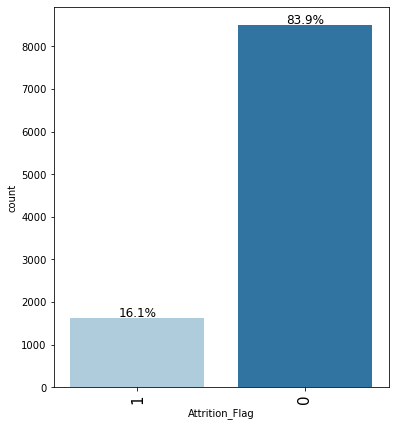

--------------------------------------------------
 
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64


<Figure size 432x288 with 0 Axes>

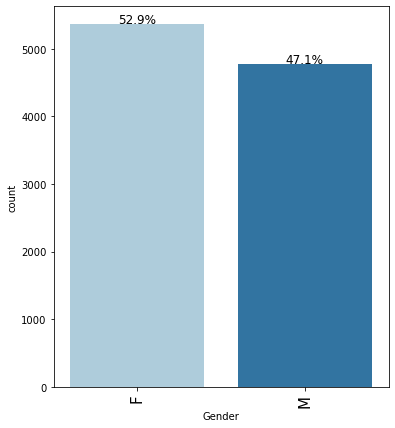

--------------------------------------------------
 
Unique values in Dependent_count are :
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64


<Figure size 432x288 with 0 Axes>

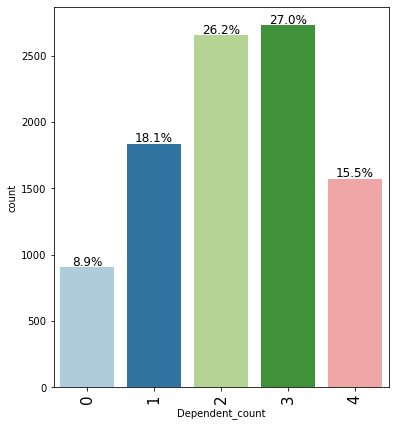

--------------------------------------------------
 
Unique values in Education_Level are :
Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


<Figure size 432x288 with 0 Axes>

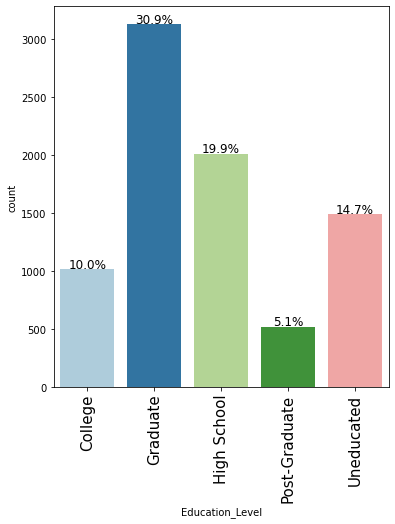

--------------------------------------------------
 
Unique values in Marital_Status are :
Married     4687
Single      3943
NaN          749
Divorced     748
Name: Marital_Status, dtype: int64


<Figure size 432x288 with 0 Axes>

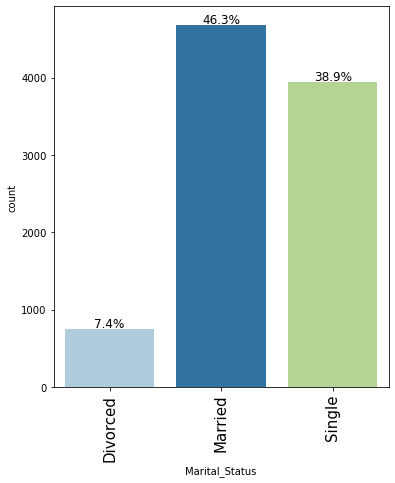

--------------------------------------------------
 
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
NaN               1112
$120K +            727
Name: Income_Category, dtype: int64


<Figure size 432x288 with 0 Axes>

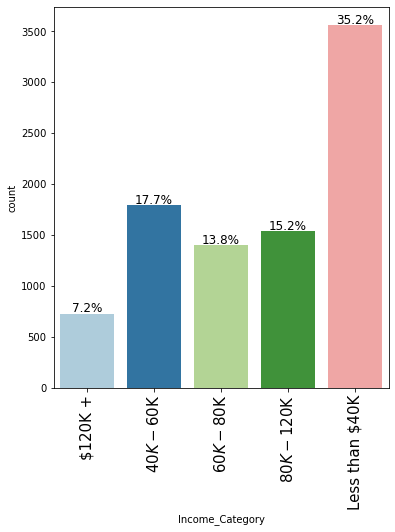

--------------------------------------------------
 
Unique values in Card_Category are :
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


<Figure size 432x288 with 0 Axes>

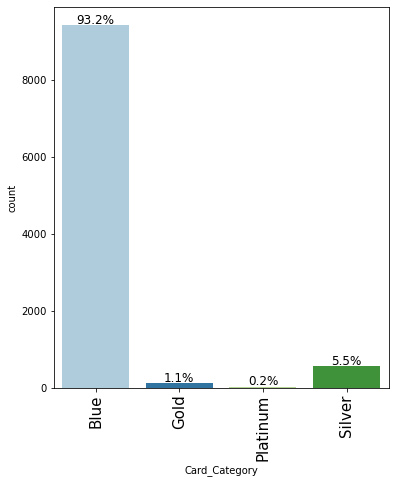

--------------------------------------------------
 
Unique values in Total_Relationship_Count are :
3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64


<Figure size 432x288 with 0 Axes>

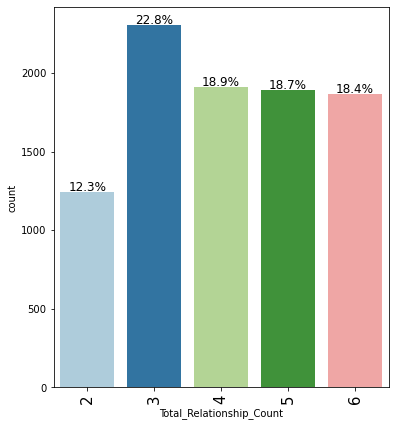

--------------------------------------------------
 
Unique values in Months_Inactive_12_mon are :
3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64


<Figure size 432x288 with 0 Axes>

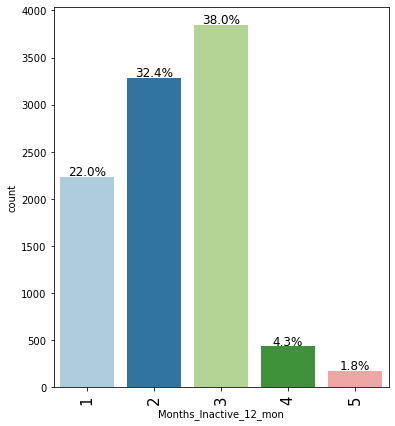

--------------------------------------------------
 
Unique values in Contacts_Count_12_mon are :
3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64


<Figure size 432x288 with 0 Axes>

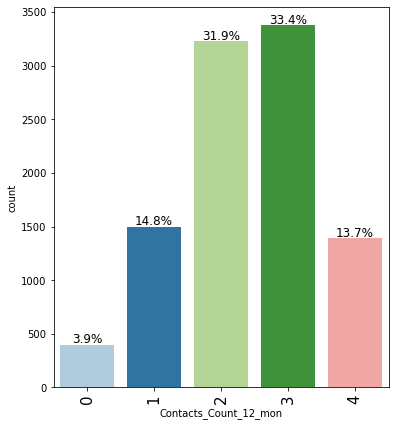

--------------------------------------------------
 
Unique values in AgeGroup are :
Less_than_50    4561
Less_than_60    2998
Less_than_40    1841
Less_than_70     530
Less_than_30     195
Less_than_80       2
Name: AgeGroup, dtype: int64


<Figure size 432x288 with 0 Axes>

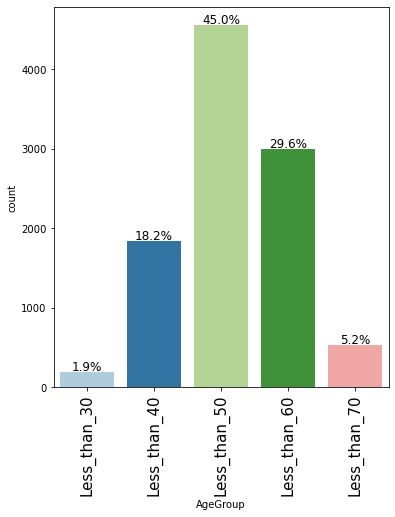

--------------------------------------------------
 
Unique values in Months_on_book_Grp are :
Between_3-4_Year    5508
Between_2-3_Year    3115
Between_4-5_Year     817
Between_1-2_Year     687
Between_0-1_Year       0
Between_5-6_Year       0
Name: Months_on_book_Grp, dtype: int64


<Figure size 432x288 with 0 Axes>

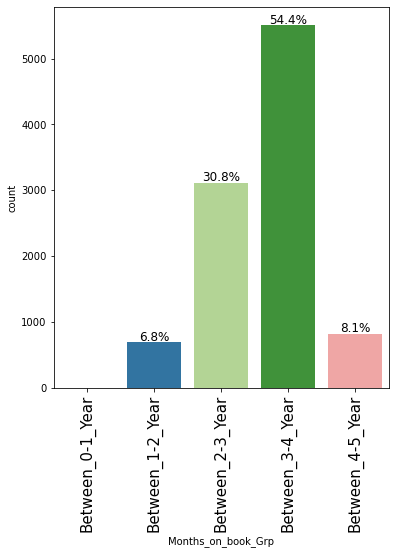

--------------------------------------------------
 
Unique values in Credit_Limit_Grp are :
<5K                5358
Between_5K-10K     2015
Between_10K-15K     941
>25K                892
Between_15K-20K     549
Between_20K-25K     372
Name: Credit_Limit_Grp, dtype: int64


<Figure size 432x288 with 0 Axes>

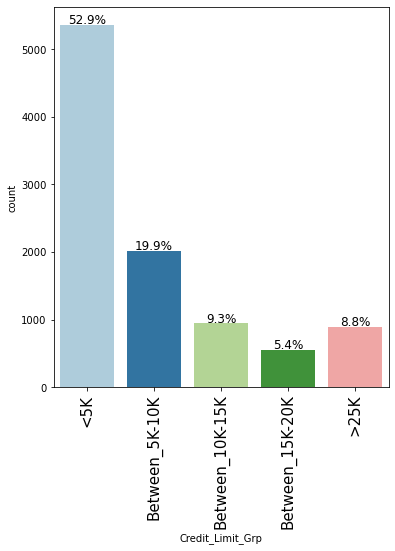

--------------------------------------------------
 


<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [420]:
# printing the number of occurrences of each unique value in each categorical column

num_to_display = 15
for column in category_columnNames:
    val_counts = df[column].value_counts(
        dropna=False
    )  # Kept dropNA to False to see the NA value count as well
    #val_countsP = df[column].value_counts(dropna=False, normalize=True)
    print("Unique values in", column, "are :")
    print(val_counts.iloc[:num_to_display])
    #print(val_countsP.iloc[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")

    labeled_barplot(df, column, perc=True, n=5)
    plt.tight_layout()

    print("-" * 50)
    print(" ")


<a id='inCategory1'> </a>

### Insights from Categorical Data
*[Click to return to TOC](#summary_home)*


**Observations:**

* 84% of the customers are existing with the bank and remaining 16% have exited from the bank
* 53% of them are Female customers and remaining Male customers
* 27% of the customers have 3 dependents, followed by 2 & 1
* 31% are Graduates, 20% are High School, 14.7% are Undergraduates, 10% college & 5.1% Post-graduates. There are few missing values that needs to be addressed
* Almost 46.3% of them are of Married status, followed by 38.9% of Single and remaining Divorced
* 35.2% fall under the income bracket f "Less than 40K", followed by 17.7% of "40K-60k" range. There are 7.2% of high salary customers that fall under the > 120K+ range 
* With the products, 93.2% of customers have the "Blue" card type, followed by Silver & Gold. Only 0.2% of them hold a Platinum card
* 22.8% of them maintain at least 3 products, followed by a uniform distribution ~18.9% of customers holding 4 or 5 or 6 products. They at least have a min of 2 products
* 38% of the customers are inactive at least for 3 months. Few of them 1.8% of them were inactive for 5 months. There has always been activity at least for 7 months in a given 12 month period
* 33.4% of the customers have had atleast 3 contacts with the bank in a 12 months period, with sum having at least 2 contacts (31.9%), 1 contact (14.8%) and 4 contacts (13.7%).  Only 3.9% of them never had any contacts
* 45% of the customers are within the age group of 40-50 years, followed by 50-60 age group
* 54% of the customers are having a relationship with the bank for 3-4 years, followed by 2-3 years of 30.8% and then 8.1% more than 4 years
* Most of the customers 52.9% of them are within the credit limit range of "< 5K" followed by 19.9% of "5k-10K". Also, 8.8% of the customers are having a higher credit limit of more than 25K, which probably needs to be validated  


---

#### Analyzing the Numerical attributes using Histogram and Box Plots

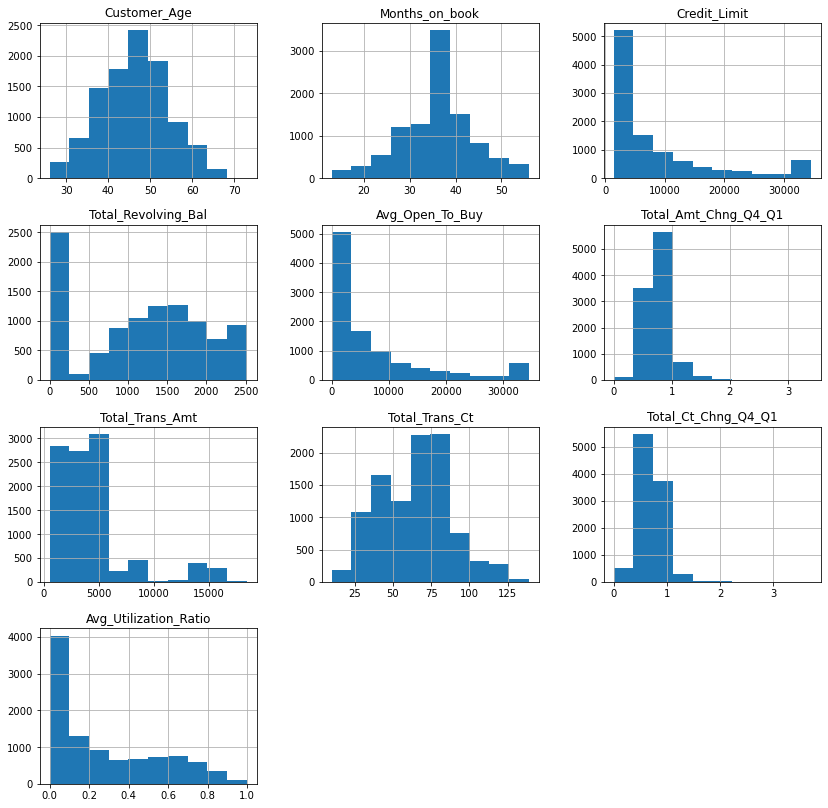

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [421]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

In [422]:
# Summary of numeric data
df.describe().T

count         mean          std     min       25%  \
Customer_Age           10127.0    46.325960     8.016814    26.0    41.000   
Months_on_book         10127.0    35.928409     7.986416    13.0    31.000   
Credit_Limit           10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal    10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy        10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1   10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt        10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct         10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1    10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio  10127.0     0.274894     0.275691     0.0     0.023   

                            50%        75%        max  
Customer_Age             46.000     52.000     73.000  
Months_on_book           36.000     40.000     56.000  
Credit_Limit           4549.000  11067.500  34516.000  
Total_Revolving_Bal    1276.000   1784.000   2517.000  
Avg_Open_To_Buy        3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1      0.736      0.859      3.397  
Total_Trans_Amt        3899.000   4741.000  18484.000  
Total_Trans_Ct           67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1       0.702      0.818      3.714  
Avg_Utilization_Ratio     0.176      0.503      0.999

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id='inNumber1'> </a>

### <a id='inNumber2'>Insights from Numerical Data</a>
*[Click to return to TOC](#summary_home)*


**Observations:**

* Age of the customers are ranging from 26 to 73 with 50% of them at 46 years
* Customers have been associated with the back for at least 31 months and with some more than 56 months. On an average 36 months of association with the bank
* 50% of the customers have a credit limit of 4549 while the average credit limit is 8632. There could be a lot of outliers which is skewing the mean and median
* The revolving card balance ranges from 0 - 2517. On average, customers have 1162 card revolving balance carried over every month
* The average amount left on the credit card is 7469 with 50% of customers having 3474 monthly amount balance
* On an average, 50% of the customers are inactive for almost 2 months with a max inactivity of 6 months
* The average utlization ratio is around 0.27 with some not utlizing the credit and having a min ratio value of 0 to max of 0.99 completly utlizing it
* On an average, they make 64 transactions in a given year with an average transaction amount of 4,404


<a id='UnivariateAnalysis1'> </a>

### Univariate Analysis
*[Click to return to TOC](#summary_home)*


#### Aalyzing the Age of the Customers

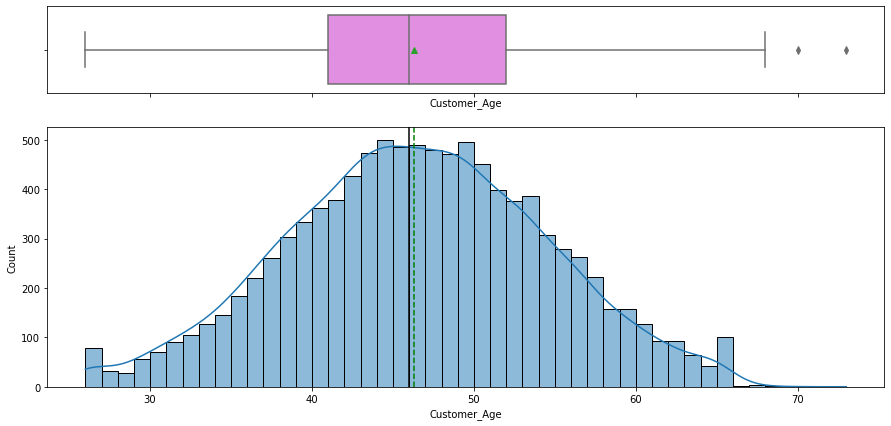

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [423]:
histogram_boxplot(df, "Customer_Age")

**Observations:**

* Age has a normal distribution with most of the Customers around the age of 30 - 70 
* The Mean & Median are closer to each other
* There are very few outliers identified in this feature data


#### Analyzing the Month (period) of relationship with the bank

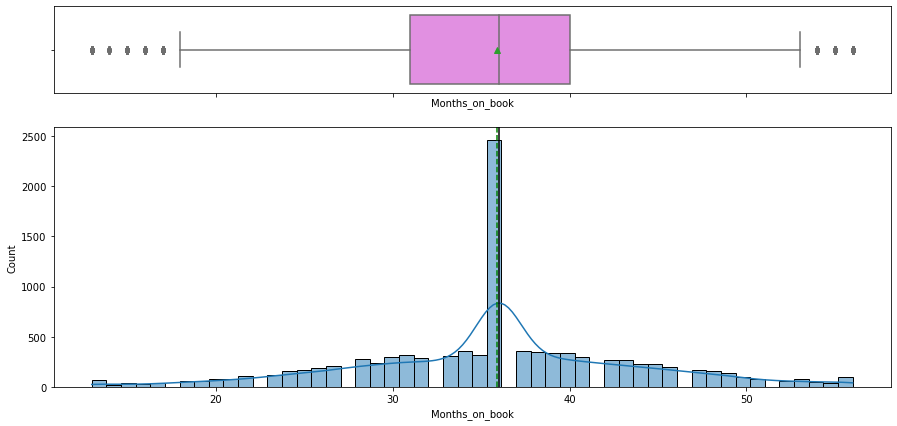

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [424]:
histogram_boxplot(df, "Months_on_book")

**Observations:**

* Mean & Median are almost close to each other
* Customers are having relationship with the back from around 10 months to close to 60 months
* The distribution looks normal with few outliers on both ends. We can check the outlier values if they are normal or to be treated


In [425]:
df[df.Months_on_book > 50]["Months_on_book"].describe()

count    418.000000
mean      53.535885
std        1.838805
min       51.000000
25%       52.000000
50%       53.000000
75%       55.000000
max       56.000000
Name: Months_on_book, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Analyzing the number of months fo relationship with the bank is only having a max of 56 months (less than 5 years) which is normal, hence we will not treat the outliers

#### Analyzing the Credit Limit

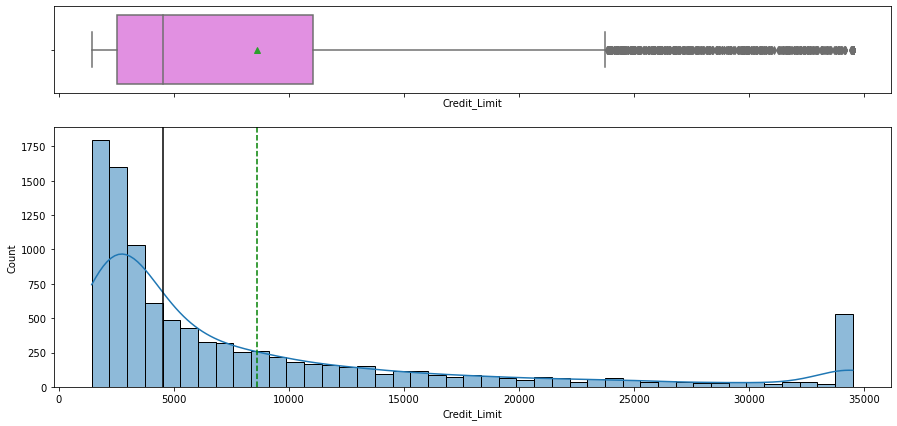

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [426]:
histogram_boxplot(df, "Credit_Limit")

* The Median is less than the Mean and possibly the data is highly skewed
* The distribution has a positive skew pattern with multiple outliers at the end
* We need to treat the outliers

In [427]:
df[(df['Credit_Limit'] > 20000)]["Income_Category"].value_counts()


$80K - $120K      520
$120K +           344
$60K - $80K       233
$40K - $60K        27
Less than $40K      0
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [428]:
# Finding the median values of the Credit Limit with respective to the Income type
df.groupby(["Income_Category"])[["Credit_Limit"]].median()

Credit_Limit
Income_Category              
$120K +               18442.0
$40K - $60K            3682.0
$60K - $80K            7660.0
$80K - $120K          12830.0
Less than $40K         2766.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [429]:
# Finding the median values of the Credit Limit with respective to the Card Category
df.groupby(["Card_Category"])[["Credit_Limit"]].median()

Credit_Limit
Card_Category              
Blue                 4105.0
Gold                34516.0
Platinum            34516.0
Silver              29808.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [430]:
df.groupby(["Income_Category", "Card_Category"])[["Credit_Limit"]].median()

Credit_Limit
Income_Category Card_Category              
$120K +         Blue                15769.0
                Gold                34516.0
                Platinum            34516.0
                Silver              34516.0
$40K - $60K     Blue                 3454.0
                Gold                23981.0
                Platinum            23981.0
                Silver              17304.0
$60K - $80K     Blue                 6784.0
                Gold                34516.0
                Platinum            34516.0
                Silver              29810.0
$80K - $120K    Blue                11617.0
                Gold                34516.0
                Platinum            34516.0
                Silver              34516.0
Less than $40K  Blue                 2705.0
                Gold                15987.0
                Platinum            15987.0
                Silver              12319.5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Analyzing the median credit limit applicable based on the income category, we see that for Customers with credit limit > 20K, there are a lot of outliers
* We see that the Card Category vs the credit limit is not related and it varies based on the income category
* Considering 20K has max credit limit based on the  median values of the income types, we will consider records more than 20K 
* Hence we will assign the median values for the outliers and for NaN we will assign the median values

In [431]:
df['Credit_Limit'] = np.where(
    ((df['Credit_Limit'] > 20000) & (df['Income_Category'] == "$40K - $60K")) , 3682, df['Credit_Limit'])

df['Credit_Limit'] = np.where(
    ((df['Credit_Limit'] > 20000) & (df['Income_Category'] == "$60K - $80K")) , 7660, df['Credit_Limit'])

df['Credit_Limit'] = np.where(
    ((df['Credit_Limit'] > 20000) & (df['Income_Category'] == "$80K - $120K")) , 12830, df['Credit_Limit'])

df['Credit_Limit'] = np.where(
    ((df['Credit_Limit'] > 20000) & (df['Income_Category'] == "$120K +")) , 18442, df['Credit_Limit'])

df['Credit_Limit'] = np.where(
    ((df['Credit_Limit'] > 20000) & (df['Income_Category'].isna())) , df['Credit_Limit'].mean(), df['Credit_Limit'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [432]:
df[(df["Credit_Limit"] > 20000)].head()

Empty DataFrame
Columns: [Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, AgeGroup, Months_on_book_Grp, Credit_Limit_Grp]
Index: []

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

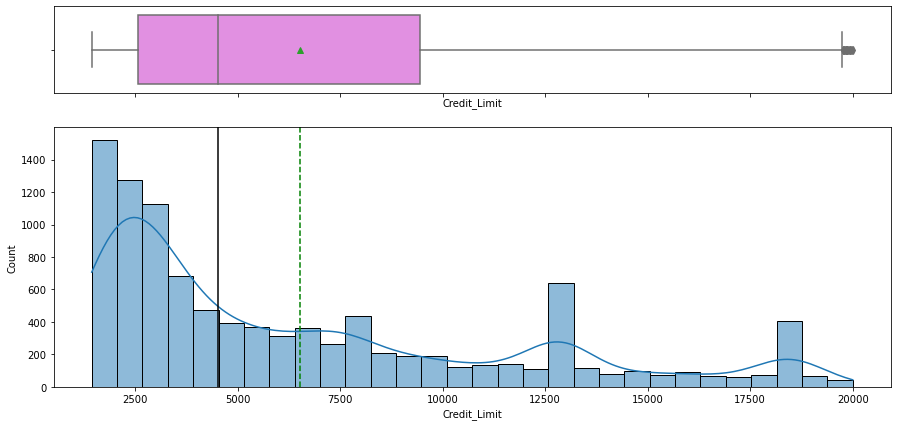

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [433]:
histogram_boxplot(df, "Credit_Limit")

* The transactions with credit limit more than 20K has been addressed 
* The outliers with the distribution have been addressed though its positively skewed

#### Analyzing the Total_Revolving_Bal

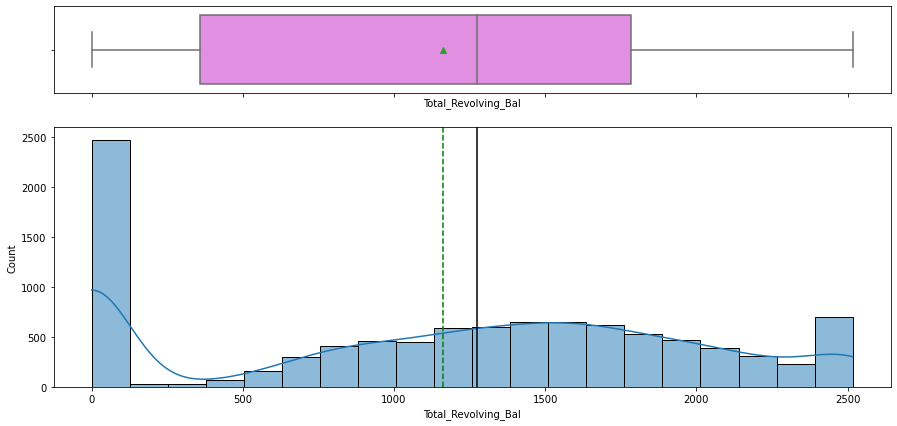

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [434]:
histogram_boxplot(df, "Total_Revolving_Bal")

**Observations:**

* Distribution is uniform without much outliers
* The Median is closer to the Mean
* Most of the customer have maintained a vew low revolving balance within a range of 0 - 250 which is cauing a bump at the beginning of the distribution


#### Analyzing the Avg_Open_To_Buy

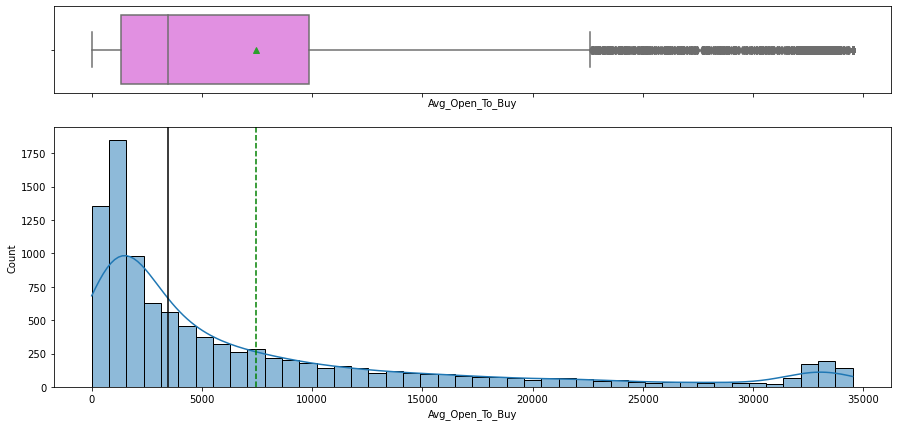

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [435]:
histogram_boxplot(df, "Avg_Open_To_Buy")

**Observations:**

* The Median is less than the Mean and possibly the data is highly skewed
* The distribution has a positive skew pattern with multiple outliers at the end
* We need to treat the outliers


In [436]:
df[(df["Avg_Open_To_Buy"] > 20000)]["Income_Category"].value_counts()

$80K - $120K      486
$120K +           328
$60K - $80K       205
$40K - $60K        22
Less than $40K      0
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [437]:
# Finding the median values of the Avg_Open_To_Buy with respective to the Income type
df.groupby(["Income_Category"])[["Avg_Open_To_Buy"]].median()

Avg_Open_To_Buy
Income_Category                 
$120K +                  17117.0
$40K - $60K               2580.5
$60K - $80K               6418.5
$80K - $120K             11606.0
Less than $40K            1478.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Analyzing the median Avg_Open_to_Buy based on the income category, we see that for Customers with credit limit > 20K, there are a lot of outliers
* Considering 20K has max credit limit based on the  median values of the income types, we will consider records more than 20K 
* We will assign the median values for the outliers and for NaN we will assign the median values

In [438]:
df["Avg_Open_To_Buy"] = np.where(
    ((df["Avg_Open_To_Buy"] > 20000) & (df["Income_Category"] == "$40K - $60K")),
    2580.5,
    df["Avg_Open_To_Buy"],
)

df["Avg_Open_To_Buy"] = np.where(
    ((df["Avg_Open_To_Buy"] > 20000) & (df["Income_Category"] == "$60K - $80K")),
    6418.5,
    df["Avg_Open_To_Buy"],
)

df["Avg_Open_To_Buy"] = np.where(
    ((df["Avg_Open_To_Buy"] > 20000) & (df["Income_Category"] == "$80K - $120K")),
    11606,
    df["Avg_Open_To_Buy"],
)

df["Avg_Open_To_Buy"] = np.where(
    ((df["Avg_Open_To_Buy"] > 20000) & (df["Income_Category"] == "$120K +")),
    17117,
    df["Avg_Open_To_Buy"],
)

df["Avg_Open_To_Buy"] = np.where(
    ((df["Avg_Open_To_Buy"] > 20000) & (df["Income_Category"].isna())),
    df["Avg_Open_To_Buy"].mean(),
    df["Avg_Open_To_Buy"],
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

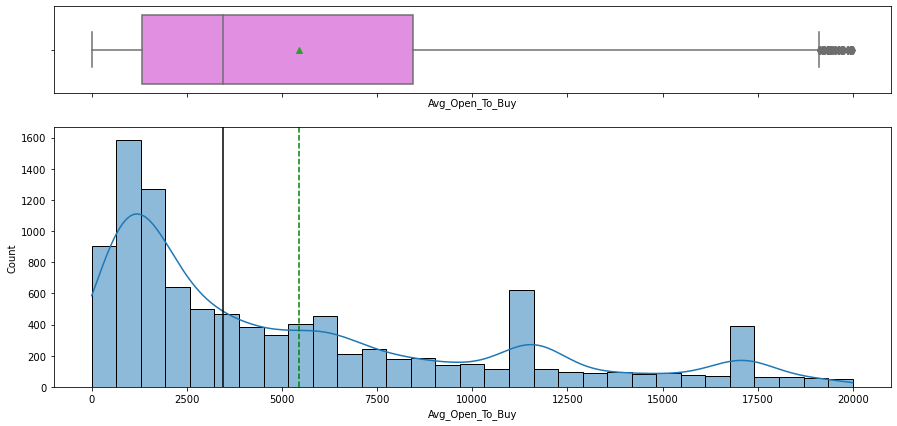

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [439]:
histogram_boxplot(df, "Avg_Open_To_Buy")

**Observations:**

* The transactions with Avg_Open_To_buy more than 20K are taken care 
* The outliers with the distribution have been addressed though its positively skewed


#### Analyzing the Total_Amt_Chng_Q4_Q1

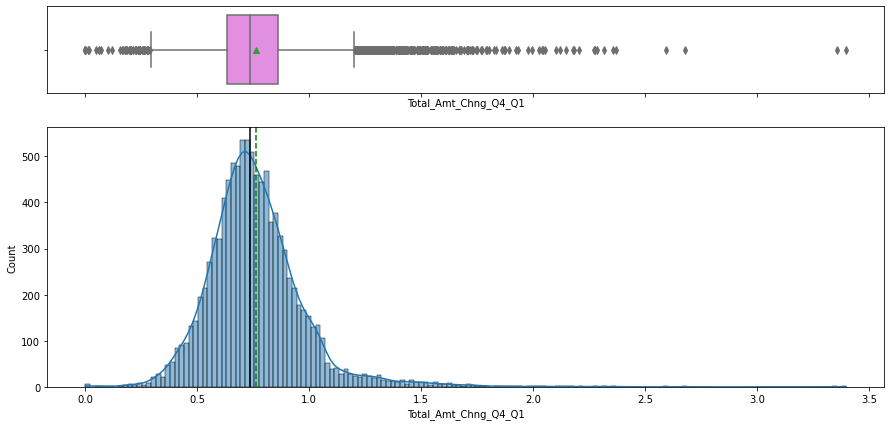

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [440]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1")

**Observations:**

* The Median almost the same as Mean
* The  feature has a good normal distribution with multiple outliers at both ends
* We will treat the outliers using IQR (25% & 75%)


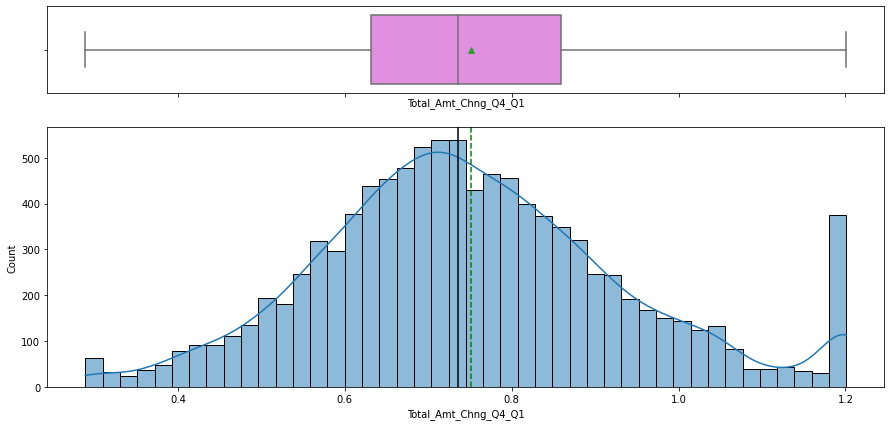

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [441]:
df = treat_outliers(df, "Total_Amt_Chng_Q4_Q1", 0.25, 0.75, 1.5)
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1")


* Distribution is uniform without much outliers


#### Analyzing the Total_Ct_Chng_Q4_Q1

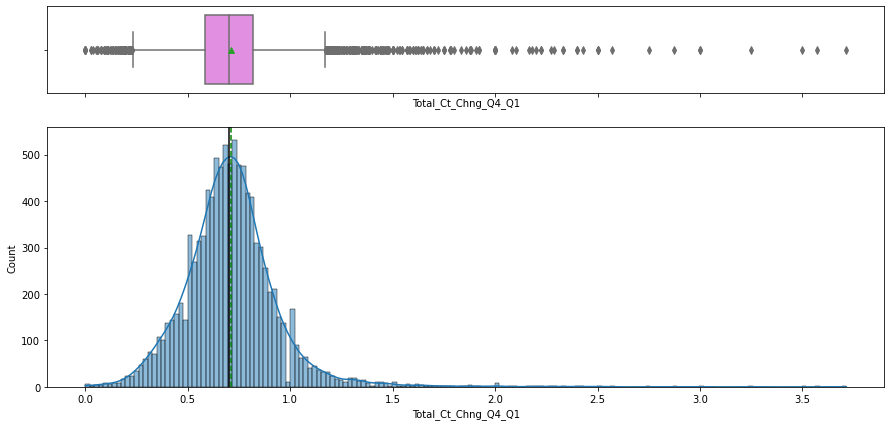

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [442]:
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1")

**Observations:**

* The Median almost the same as Mean
* The  feature has a good normal distribution with multiple outliers at both ends
* We will treat the outliers using IQR (25% & 75%)


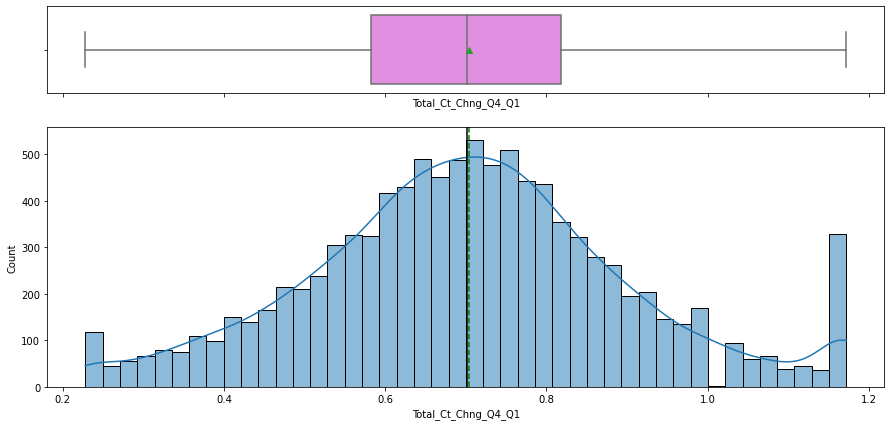

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [443]:
df = treat_outliers(df, "Total_Ct_Chng_Q4_Q1", 0.25, 0.75, 1.5)
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1")


* The distribution is normal without outliers


#### Analyzing the Total_Trans_Amt

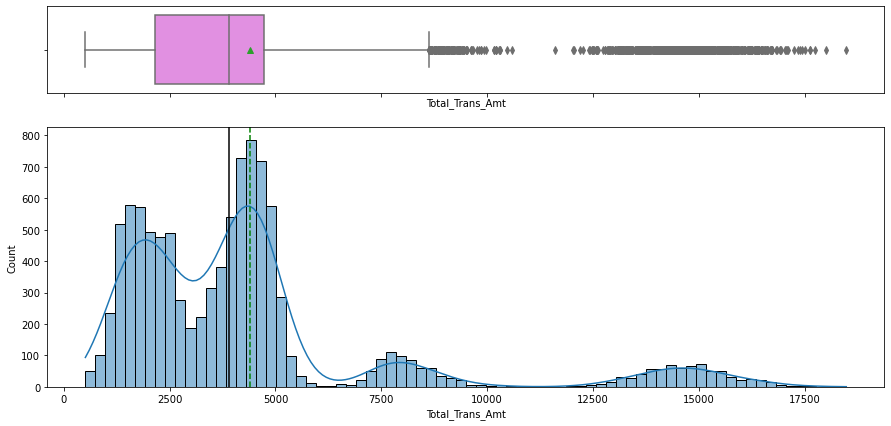

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [444]:
histogram_boxplot(df, "Total_Trans_Amt")

In [445]:
df.groupby(["Income_Category"])[["Credit_Limit"]].median()

Credit_Limit
Income_Category              
$120K +               18442.0
$40K - $60K            3682.0
$60K - $80K            7656.5
$80K - $120K          12830.0
Less than $40K         2766.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [446]:
df.groupby(["Card_Category"])[["Credit_Limit"]].median()

Credit_Limit
Card_Category              
Blue                 4105.0
Gold                12830.0
Platinum            10245.0
Silver              12830.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [447]:
df.groupby(["Card_Category", "Income_Category"])[["Credit_Limit"]].median()

Credit_Limit
Card_Category Income_Category              
Blue          $120K +               15769.0
              $40K - $60K            3454.0
              $60K - $80K            6784.0
              $80K - $120K          11617.0
              Less than $40K         2705.0
Gold          $120K +               18442.0
              $40K - $60K            3682.0
              $60K - $80K            7660.0
              $80K - $120K          12830.0
              Less than $40K        15987.0
Platinum      $120K +               18442.0
              $40K - $60K            3682.0
              $60K - $80K            7660.0
              $80K - $120K          12830.0
              Less than $40K        15987.0
Silver        $120K +               18442.0
              $40K - $60K           16406.0
              $60K - $80K            7660.0
              $80K - $120K          12830.0
              Less than $40K        12319.5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [448]:
df.groupby(["Card_Category", "Income_Category"])[["Total_Trans_Amt"]].median()

Total_Trans_Amt
Card_Category Income_Category                 
Blue          $120K +                   3453.0
              $40K - $60K               3918.0
              $60K - $80K               3444.0
              $80K - $120K              3448.0
              Less than $40K            4084.0
Gold          $120K +                   7897.5
              $40K - $60K              13847.0
              $60K - $80K               7582.0
              $80K - $120K              5547.0
              Less than $40K            7370.0
Platinum      $120K +                  10896.5
              $40K - $60K               4758.0
              $60K - $80K              11427.0
              $80K - $120K              7504.5
              Less than $40K            8059.5
Silver        $120K +                   4485.5
              $40K - $60K               4232.0
              $60K - $80K               4055.0
              $80K - $120K              4544.0
              Less than $40K            4699.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

* The Median is closed to the Mean value
* Credit Limits are porportional to the Income category and not based on Card category
* Based on the income category, we can see that the Total Transaction amounts are aligned. Hence we dont need to treat the outliers

#### Analyzing the Total_Trans_Ct

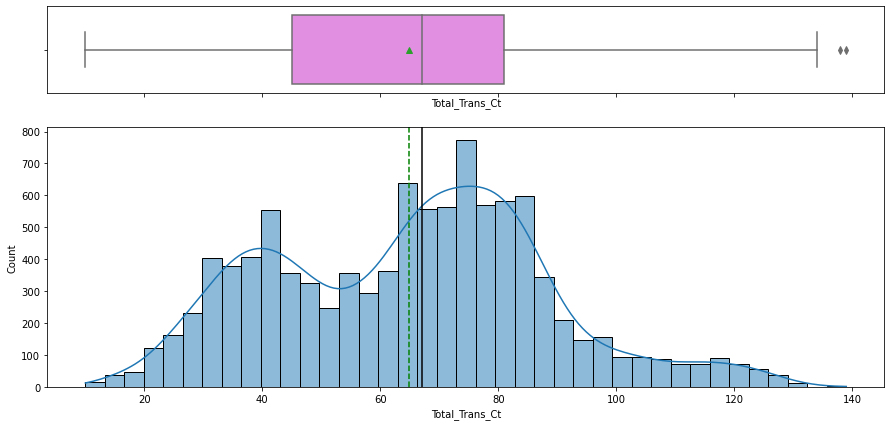

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [449]:
histogram_boxplot(df, "Total_Trans_Ct")

**Observations:**

* The distribution seems to be highly normalized without any outliers


#### Analyzing the Avg_Utilization_Ratio

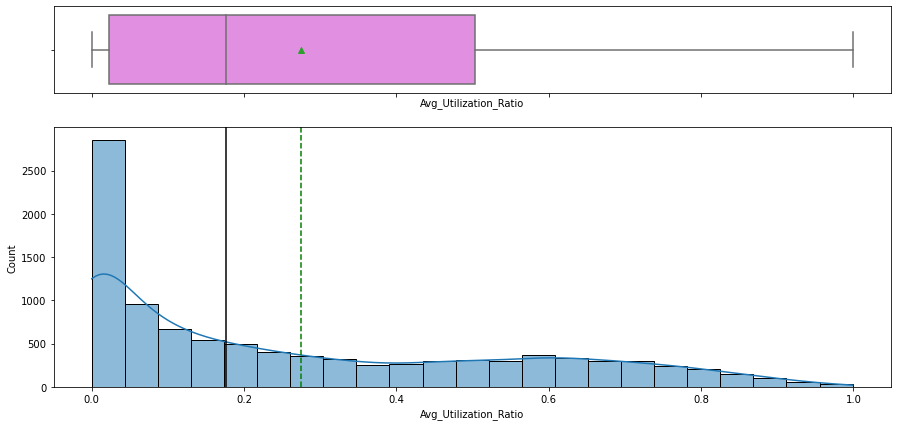

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [450]:
histogram_boxplot(df, "Avg_Utilization_Ratio")

**Observations:**

* The distribution seems to be positively skewed without outliers


<a id="dataposttreatment"> </a>
 
### Data Description Post Treament
*[Click to return to TOC](#summary_home)*


In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [453]:
# Data Secription of Categorical variables
df.describe(include="category").T


count unique               top  freq
Attrition_Flag            10127      2                 0  8500
Gender                    10127      2                 F  5358
Dependent_count           10127      6                 3  2732
Education_Level            8608      6          Graduate  3128
Marital_Status             9378      3           Married  4687
Income_Category            9015      5    Less than $40K  3561
Card_Category             10127      4              Blue  9436
Total_Relationship_Count  10127      6                 3  2305
Months_Inactive_12_mon    10127      7                 3  3846
Contacts_Count_12_mon     10127      7                 3  3380
AgeGroup                  10127      6      Less_than_50  4561
Months_on_book_Grp        10127      4  Between_3-4_Year  5508
Credit_Limit_Grp          10127      6               <5K  5358

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [454]:
# Data Secription of Categorical variables
df.describe().T


count         mean          std       min       25%  \
Customer_Age           10127.0    46.325960     8.016814    26.000    41.000   
Months_on_book         10127.0    35.928409     7.986416    13.000    31.000   
Credit_Limit           10127.0  6528.924665  5023.257606  1438.300  2555.000   
Total_Revolving_Bal    10127.0  1162.814061   814.987335     0.000   359.000   
Avg_Open_To_Buy        10127.0  5453.166224  5172.994080     3.000  1324.500   
Total_Amt_Chng_Q4_Q1   10127.0     0.751387     0.184542     0.289     0.631   
Total_Trans_Amt        10127.0  4404.086304  3397.129254   510.000  2155.500   
Total_Trans_Ct         10127.0    64.858695    23.472570    10.000    45.000   
Total_Ct_Chng_Q4_Q1    10127.0     0.703484     0.197203     0.228     0.582   
Avg_Utilization_Ratio  10127.0     0.274894     0.275691     0.000     0.023   

                            50%       75%        max  
Customer_Age             46.000    52.000     73.000  
Months_on_book           36.000    40.000     56.000  
Credit_Limit           4507.000  9435.000  19999.000  
Total_Revolving_Bal    1276.000  1784.000   2517.000  
Avg_Open_To_Buy        3440.000  8436.000  19995.000  
Total_Amt_Chng_Q4_Q1      0.736     0.859      1.201  
Total_Trans_Amt        3899.000  4741.000  18484.000  
Total_Trans_Ct           67.000    81.000    139.000  
Total_Ct_Chng_Q4_Q1       0.702     0.818      1.172  
Avg_Utilization_Ratio     0.176     0.503      0.999

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id="bivariate"> </a>
 
### Bivariate Analysis
*[Click to return to TOC](#summary_home)*



### Visualise variables association with Attrition parameter & its correlation


#### Analyzing the Categorial attributes with Attrition Flag

------------------------------  Volume  ------------------------------
Attrition_Flag     1     0    All
Attrition_Flag                   
1               1627     0   1627
All             1627  8500  10127
0                  0  8500   8500
------------------------------  Percentage %  ------------------------------
Attrition_Flag        1        0
Attrition_Flag                  
1               1.00000  0.00000
All             0.16066  0.83934
0               0.00000  1.00000
------------------------------------------------------------------------------------------------------------------------


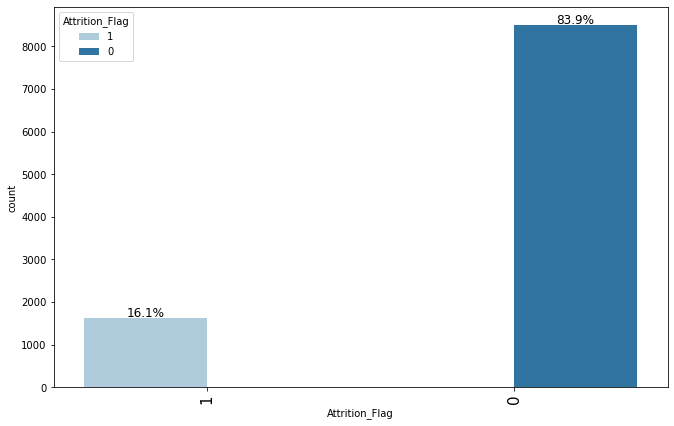

------------------------------  Volume  ------------------------------
Attrition_Flag     1     0    All
Gender                           
All             1627  8500  10127
F                930  4428   5358
M                697  4072   4769
------------------------------  Percentage %  ------------------------------
Attrition_Flag         1         0
Gender                            
F               0.173572  0.826428
All             0.160660  0.839340
M               0.146152  0.853848
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

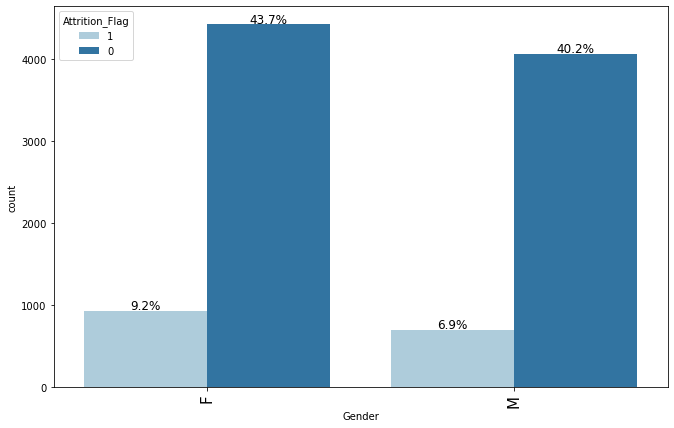

------------------------------  Volume  ------------------------------
Attrition_Flag      1     0    All
Dependent_count                   
All              1627  8500  10127
3                 482  2250   2732
2                 417  2238   2655
1                 269  1569   1838
4                 260  1314   1574
0                 135   769    904
5                  64   360    424
------------------------------  Percentage %  ------------------------------
Attrition_Flag          1         0
Dependent_count                    
3                0.176428  0.823572
4                0.165184  0.834816
All              0.160660  0.839340
2                0.157062  0.842938
5                0.150943  0.849057
0                0.149336  0.850664
1                0.146355  0.853645
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

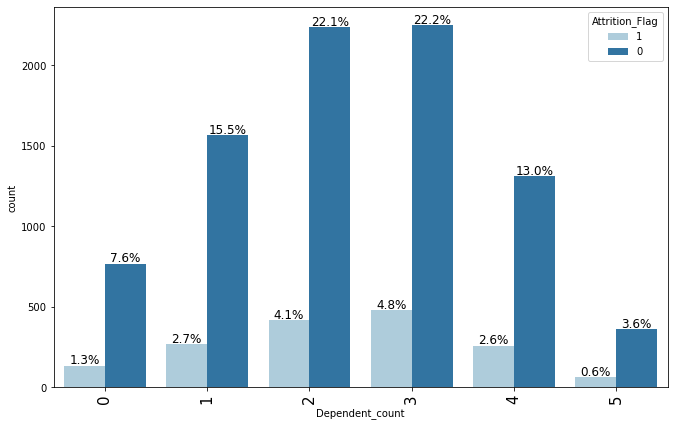

------------------------------  Volume  ------------------------------
Attrition_Flag      1     0   All
Education_Level                  
All              1371  7237  8608
Graduate          487  2641  3128
High School       306  1707  2013
Uneducated        237  1250  1487
College           154   859  1013
Doctorate          95   356   451
Post-Graduate      92   424   516
------------------------------  Percentage %  ------------------------------
Attrition_Flag          1         0
Education_Level                    
Doctorate        0.210643  0.789357
Post-Graduate    0.178295  0.821705
Uneducated       0.159381  0.840619
All              0.159270  0.840730
Graduate         0.155691  0.844309
College          0.152024  0.847976
High School      0.152012  0.847988
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

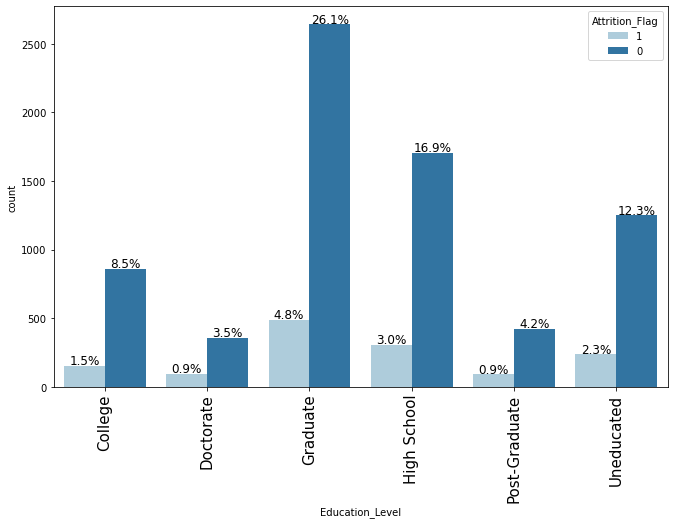

------------------------------  Volume  ------------------------------
Attrition_Flag     1     0   All
Marital_Status                  
All             1498  7880  9378
Married          709  3978  4687
Single           668  3275  3943
Divorced         121   627   748
------------------------------  Percentage %  ------------------------------
Attrition_Flag         1         0
Marital_Status                    
Single          0.169414  0.830586
Divorced        0.161765  0.838235
All             0.159736  0.840264
Married         0.151269  0.848731
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

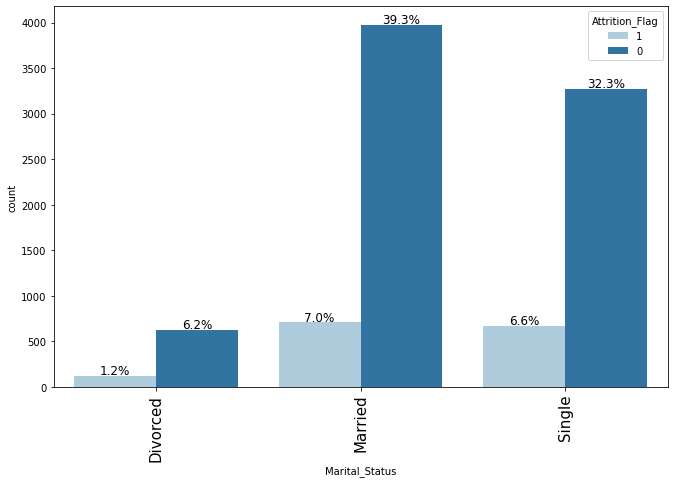

------------------------------  Volume  ------------------------------
Attrition_Flag      1     0   All
Income_Category                  
All              1440  7575  9015
Less than $40K    612  2949  3561
$40K - $60K       271  1519  1790
$80K - $120K      242  1293  1535
$60K - $80K       189  1213  1402
$120K +           126   601   727
------------------------------  Percentage %  ------------------------------
Attrition_Flag          1         0
Income_Category                    
$120K +          0.173315  0.826685
Less than $40K   0.171862  0.828138
All              0.159734  0.840266
$80K - $120K     0.157655  0.842345
$40K - $60K      0.151397  0.848603
$60K - $80K      0.134807  0.865193
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

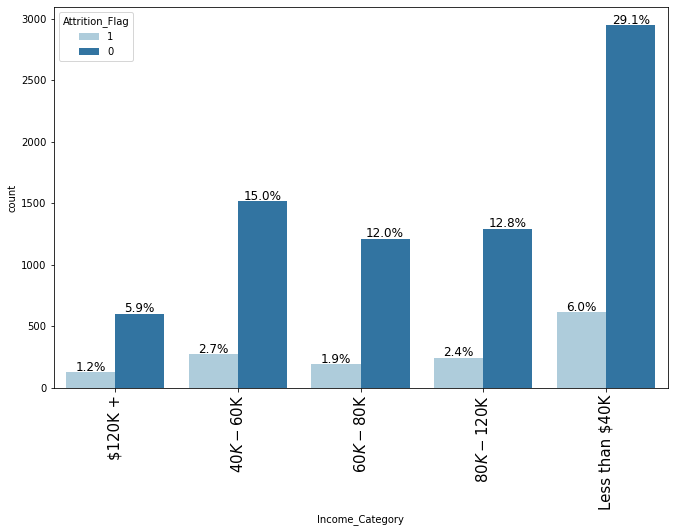

------------------------------  Volume  ------------------------------
Attrition_Flag     1     0    All
Card_Category                    
All             1627  8500  10127
Blue            1519  7917   9436
Silver            82   473    555
Gold              21    95    116
Platinum           5    15     20
------------------------------  Percentage %  ------------------------------
Attrition_Flag         1         0
Card_Category                     
Platinum        0.250000  0.750000
Gold            0.181034  0.818966
Blue            0.160979  0.839021
All             0.160660  0.839340
Silver          0.147748  0.852252
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

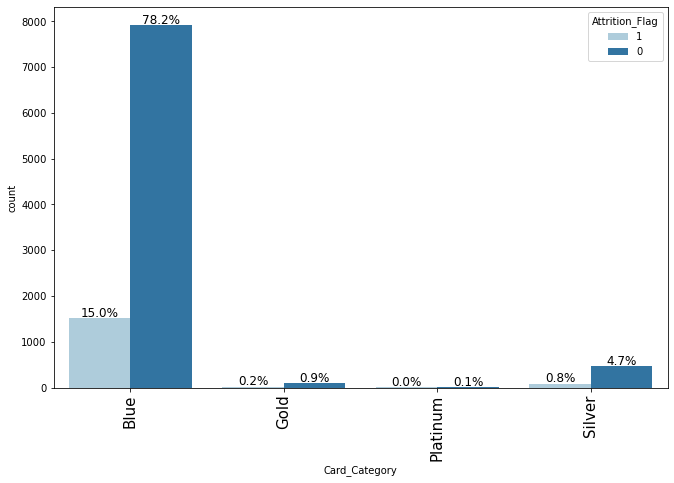

------------------------------  Volume  ------------------------------
Attrition_Flag               1     0    All
Total_Relationship_Count                   
All                       1627  8500  10127
3                          400  1905   2305
2                          346   897   1243
1                          233   677    910
5                          227  1664   1891
4                          225  1687   1912
6                          196  1670   1866
------------------------------  Percentage %  ------------------------------
Attrition_Flag                   1         0
Total_Relationship_Count                    
2                         0.278359  0.721641
1                         0.256044  0.743956
3                         0.173536  0.826464
All                       0.160660  0.839340
5                         0.120042  0.879958
4                         0.117678  0.882322
6                         0.105038  0.894962
---------------------------------------------------

<Figure size 432x288 with 0 Axes>

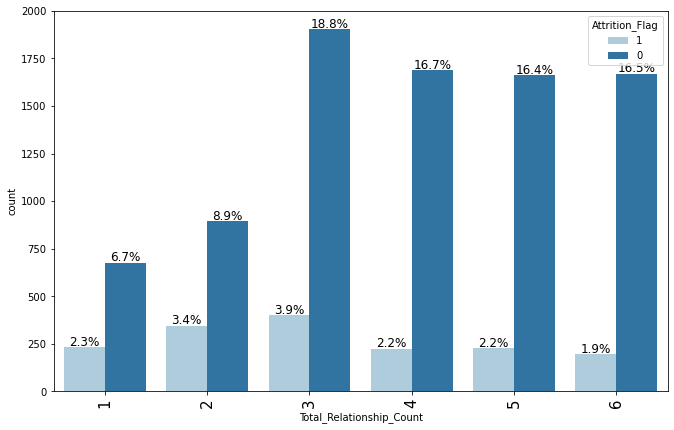

------------------------------  Volume  ------------------------------
Attrition_Flag             1     0    All
Months_Inactive_12_mon                   
All                     1627  8500  10127
3                        826  3020   3846
2                        505  2777   3282
4                        130   305    435
1                        100  2133   2233
5                         32   146    178
6                         19   105    124
0                         15    14     29
------------------------------  Percentage %  ------------------------------
Attrition_Flag                 1         0
Months_Inactive_12_mon                    
0                       0.517241  0.482759
4                       0.298851  0.701149
3                       0.214769  0.785231
5                       0.179775  0.820225
All                     0.160660  0.839340
2                       0.153870  0.846130
6                       0.153226  0.846774
1                       0.044783  0.955217
--

<Figure size 432x288 with 0 Axes>

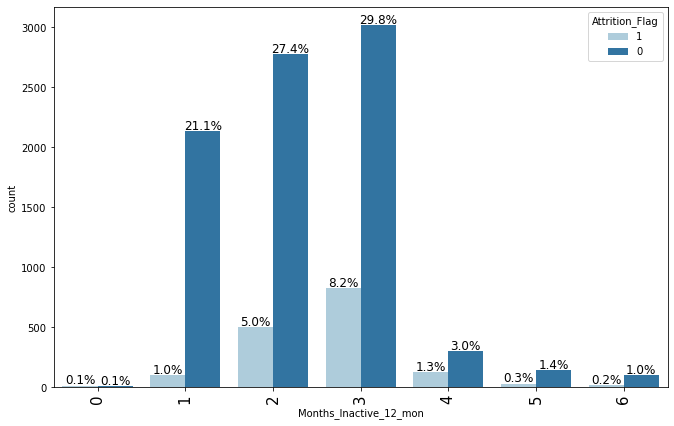

------------------------------  Volume  ------------------------------
Attrition_Flag            1     0    All
Contacts_Count_12_mon                   
All                    1627  8500  10127
3                       681  2699   3380
2                       403  2824   3227
4                       315  1077   1392
1                       108  1391   1499
5                        59   117    176
6                        54     0     54
0                         7   392    399
------------------------------  Percentage %  ------------------------------
Attrition_Flag                1         0
Contacts_Count_12_mon                    
6                      1.000000  0.000000
5                      0.335227  0.664773
4                      0.226293  0.773707
3                      0.201479  0.798521
All                    0.160660  0.839340
2                      0.124884  0.875116
1                      0.072048  0.927952
0                      0.017544  0.982456
----------------------

<Figure size 432x288 with 0 Axes>

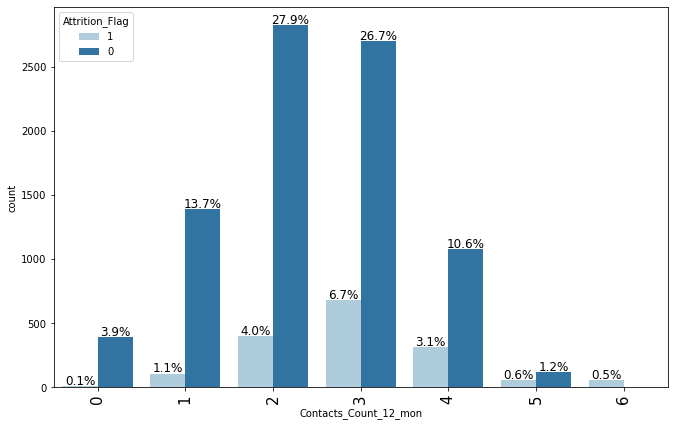

------------------------------  Volume  ------------------------------
Attrition_Flag     1     0    All
AgeGroup                         
All             1627  8500  10127
Less_than_50     772  3789   4561
Less_than_60     506  2492   2998
Less_than_40     261  1580   1841
Less_than_70      71   459    530
Less_than_30      17   178    195
Less_than_80       0     2      2
------------------------------  Percentage %  ------------------------------
Attrition_Flag         1         0
AgeGroup                          
Less_than_50    0.169261  0.830739
Less_than_60    0.168779  0.831221
All             0.160660  0.839340
Less_than_40    0.141771  0.858229
Less_than_70    0.133962  0.866038
Less_than_30    0.087179  0.912821
Less_than_80    0.000000  1.000000
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

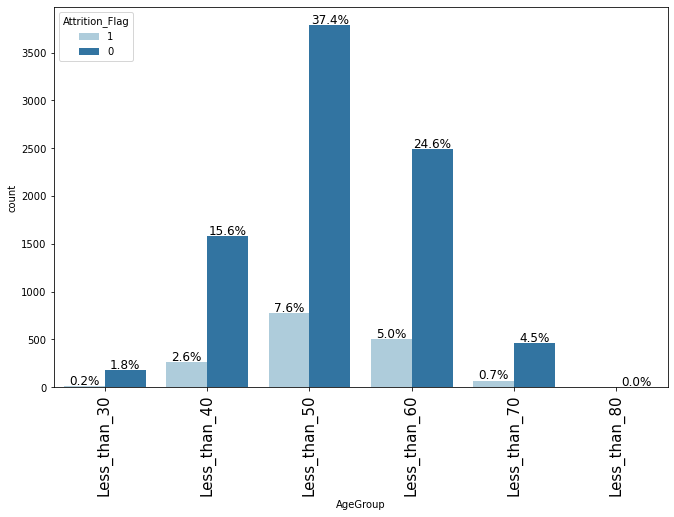

------------------------------  Volume  ------------------------------
Attrition_Flag         1     0    All
Months_on_book_Grp                   
All                 1627  8500  10127
Between_3-4_Year     922  4586   5508
Between_2-3_Year     469  2646   3115
Between_4-5_Year     138   679    817
Between_1-2_Year      98   589    687
------------------------------  Percentage %  ------------------------------
Attrition_Flag             1         0
Months_on_book_Grp                    
Between_4-5_Year    0.168911  0.831089
Between_3-4_Year    0.167393  0.832607
All                 0.160660  0.839340
Between_2-3_Year    0.150562  0.849438
Between_1-2_Year    0.142649  0.857351
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

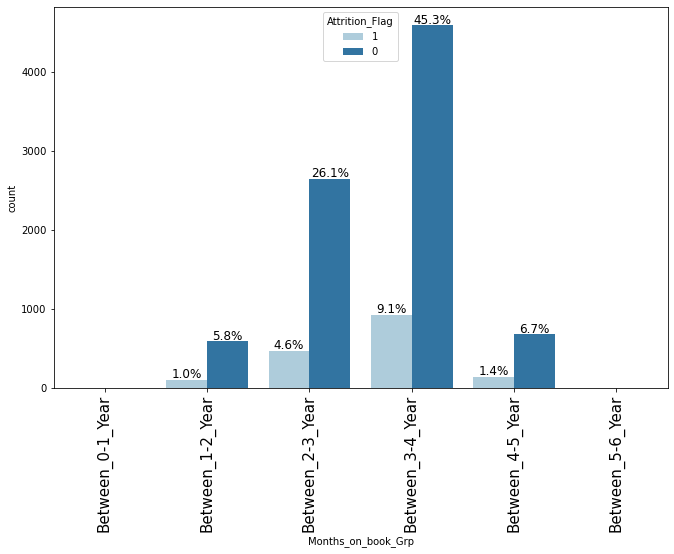

------------------------------  Volume  ------------------------------
Attrition_Flag       1     0    All
Credit_Limit_Grp                   
All               1627  8500  10127
<5K                926  4432   5358
Between_5K-10K     302  1713   2015
Between_10K-15K    145   796    941
>25K               141   751    892
Between_15K-20K     70   479    549
Between_20K-25K     43   329    372
------------------------------  Percentage %  ------------------------------
Attrition_Flag           1         0
Credit_Limit_Grp                    
<5K               0.172826  0.827174
All               0.160660  0.839340
>25K              0.158072  0.841928
Between_10K-15K   0.154091  0.845909
Between_5K-10K    0.149876  0.850124
Between_15K-20K   0.127505  0.872495
Between_20K-25K   0.115591  0.884409
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

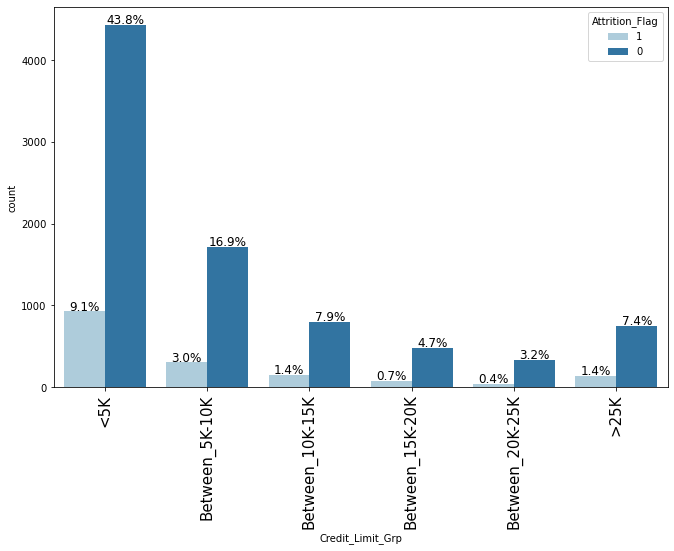

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [315]:
# Creating a function to display the values of the attributes against the chart
for i, cols in zip(range(len(category_columnNames)), category_columnNames):
    count = df[cols].nunique()
    sorter = df["Attrition_Flag"].value_counts(dropna=False).index[-1]
    tab1 = pd.crosstab(df[cols], df["Attrition_Flag"], margins=True,).sort_values(
        by=sorter, ascending=False
    )
    print("-" * 30, " Volume ", "-" * 30)
    print(tab1)

    tab1 = pd.crosstab(
        df[cols], df["Attrition_Flag"], margins=True, normalize="index"
    ).sort_values(by=sorter, ascending=False)
    print("-" * 30, " Percentage % ", "-" * 30)
    print(tab1)
    print("-" * 120)
    
    labeled_barplot(df, cols, perc=True, n=10, hueCol="Attrition_Flag")
    plt.tight_layout()


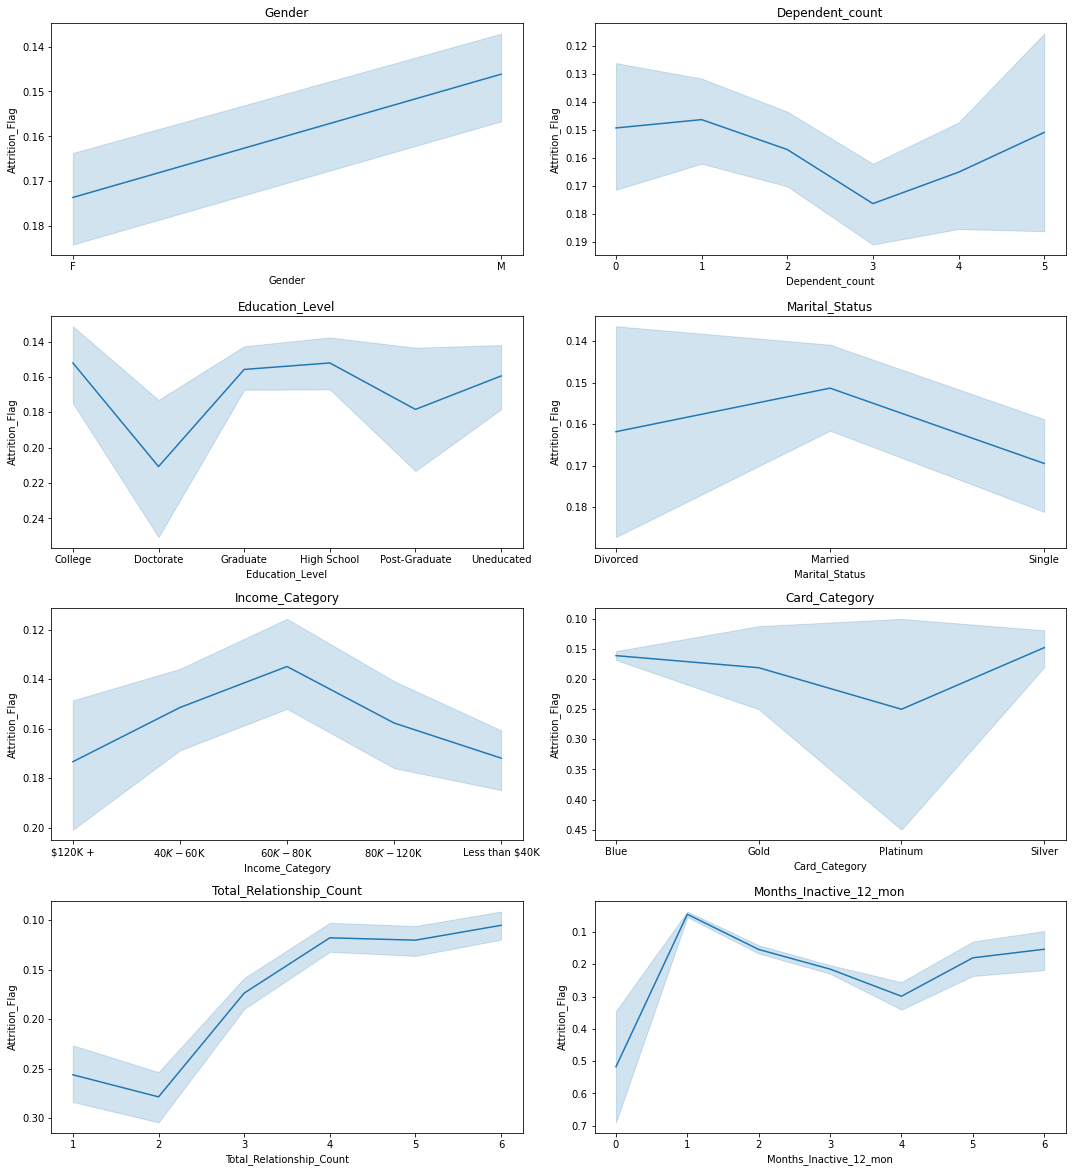

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [316]:
plt.figure(figsize=(15, 20))

line_columnnames=['Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon']

for i, variable in enumerate(line_columnnames):
    plt.subplot(5, 2, i + 1)
    sns.lineplot(x=variable, y="Attrition_Flag", data=df)
    plt.tight_layout()
    plt.title(variable)
plt.show()


<a id='BivariateCat'> </a>

**Observation:**

*[Click to return to TOC](#summary_home)*


**`Attrition_Flag` vs `Gender`**

* Female Customers are more when comapred to Male customers
* In the female customers, 43.7% are existing customers while 9.2% had left. Under male customers, 40.2% are existing while 6.9% had left.
* Though Female customers are more, the retention % of male customers is more at 85% when compared with 83% of Female customers. We see more attrition in Female customers

**`Attrition_Flag` vs `Dependent_count`**

* Dependendts with 3 members are more than all other types with 22.2% existing & 4.8% exited
* Dependendts with 2 & 1 members are the next set of types
* Almost 84-85% of the customers within the respective types are existing and 15% have left. Dependent count doesnt seems to be influencing the attrition

**`Attrition_Flag` vs `Education_Level`**

* Most of the Customers are "Graduates' with 26.1% existing and 4.8% left the service
* High schoolers are the next with 16.9% existing and 3.0% left
* When compared with the attrition percentage, Doctorates seems to have an higher attrition rate of 21% within their respective population, followed by Post-Graduates at 18%
* College & High Schoolers seem to have less attrition

**`Attrition_Flag` vs `Marital_Status`**

* Married customers are more than the other types, with 39.3% of them existing and 7% left
* With respective to attrition within their population, Single customers have an higher attrition of 17% followed by Divorced
* Married customers seems to continue more with the bank

**`Attrition_Flag` vs `Income_Category`**

* Customers under "Less that 40K" seems to have the higher popualtion, with 29.1% still with the bank and 6% left
* "40K - 60K" are the next set of customers with 15% existing and 2.7% left
* With respective to attrition within their population, "120K +" customers seem to have an higher attrition of 17% followed by "Less than 40K"
* Customers with in the range of 40 - 80K seems to have less attrition and stay longer

**`Attrition_Flag` vs `Card_Category`**

* "Blue" card customers are the maximum in the population with 78% still existing and 15% exited
* "Silver" card is the next card, with a very minimum customers less than ~0.9% in Gold & Platinum
* In terms of attrition within their respective populations, Platinum & Gold seems to have higher attrition, followed by Blue and then Silver

**`Attrition_Flag` vs `Total_Relationship_Count`**

* Customers with total no. of products = 3 are more than the other set of customers, followed by 4/5/6 products
* Surprisingly customers holding only 2 or 1 card have higher attrition than the other products
* Probably if the customers have more products (more than 3) tied with the bank, they will continue to stay with the bank

**`Attrition_Flag` vs `Months_Inactive_12_mon`**

* Customers with 3 months of inactivity are more than the other set of customers, followed by 2/1 months of inactivity. 29.8% of them are existing and 8.2% have exited
* Customers who are very active have a very low chance of existing
* At a max, most of the customers are active at least for 6 months based on the data
* The more the customers are inactive, there is high chance of them exiting 

**`Attrition_Flag` vs `Contacts_Count_12_mon`**

* Customers with only 2 contacts in 12 months are the most number of customers. Within this 28% of them are existing and 4% of them have left
* Followed by 3 contacts in 12 months with 26.7% existing and 6.7% left
* When compared with the attrition rate within the popluation, we see Customers with contacts 6/5/4 in 12 months seem to have left more than other number of contacts
* The more the customers are contacted, we see that the customers tend to exit. We should limit the number of contacts

**`Attrition_Flag` vs `Age_Group`**

* Customers with in the age group of "less than 50" are the most customers with 37.4% existing and 7.6% left
* With respect to attrition within their population, we see customers at ages of 40-50 / 50-60 have an higher attrition rate

**`Attrition_Flag` vs `Months_on_book_Grp`**

* Customers within the range of 3-4 years of relationship with the bank are more than the other group - with 45.3% still continuing and 9.1% left
* When compared with the attition within the popualtion of the attrition groups, we see that the aged groups have more attrition than the lower age groups

**`Attrition_Flag` vs `Credit_Limit_Grp`**

* 43.8% of the existing customers are within the credit limit of <5K and 9.1% of them in this group had left
* In terms of attrition within population, the same group has the highes attrition
* Attrition has been less when the credit limit is more for the customer. Probably we need to increase the credit limits of the customer


#### Analyzing the Numerical attributes with Product Taken

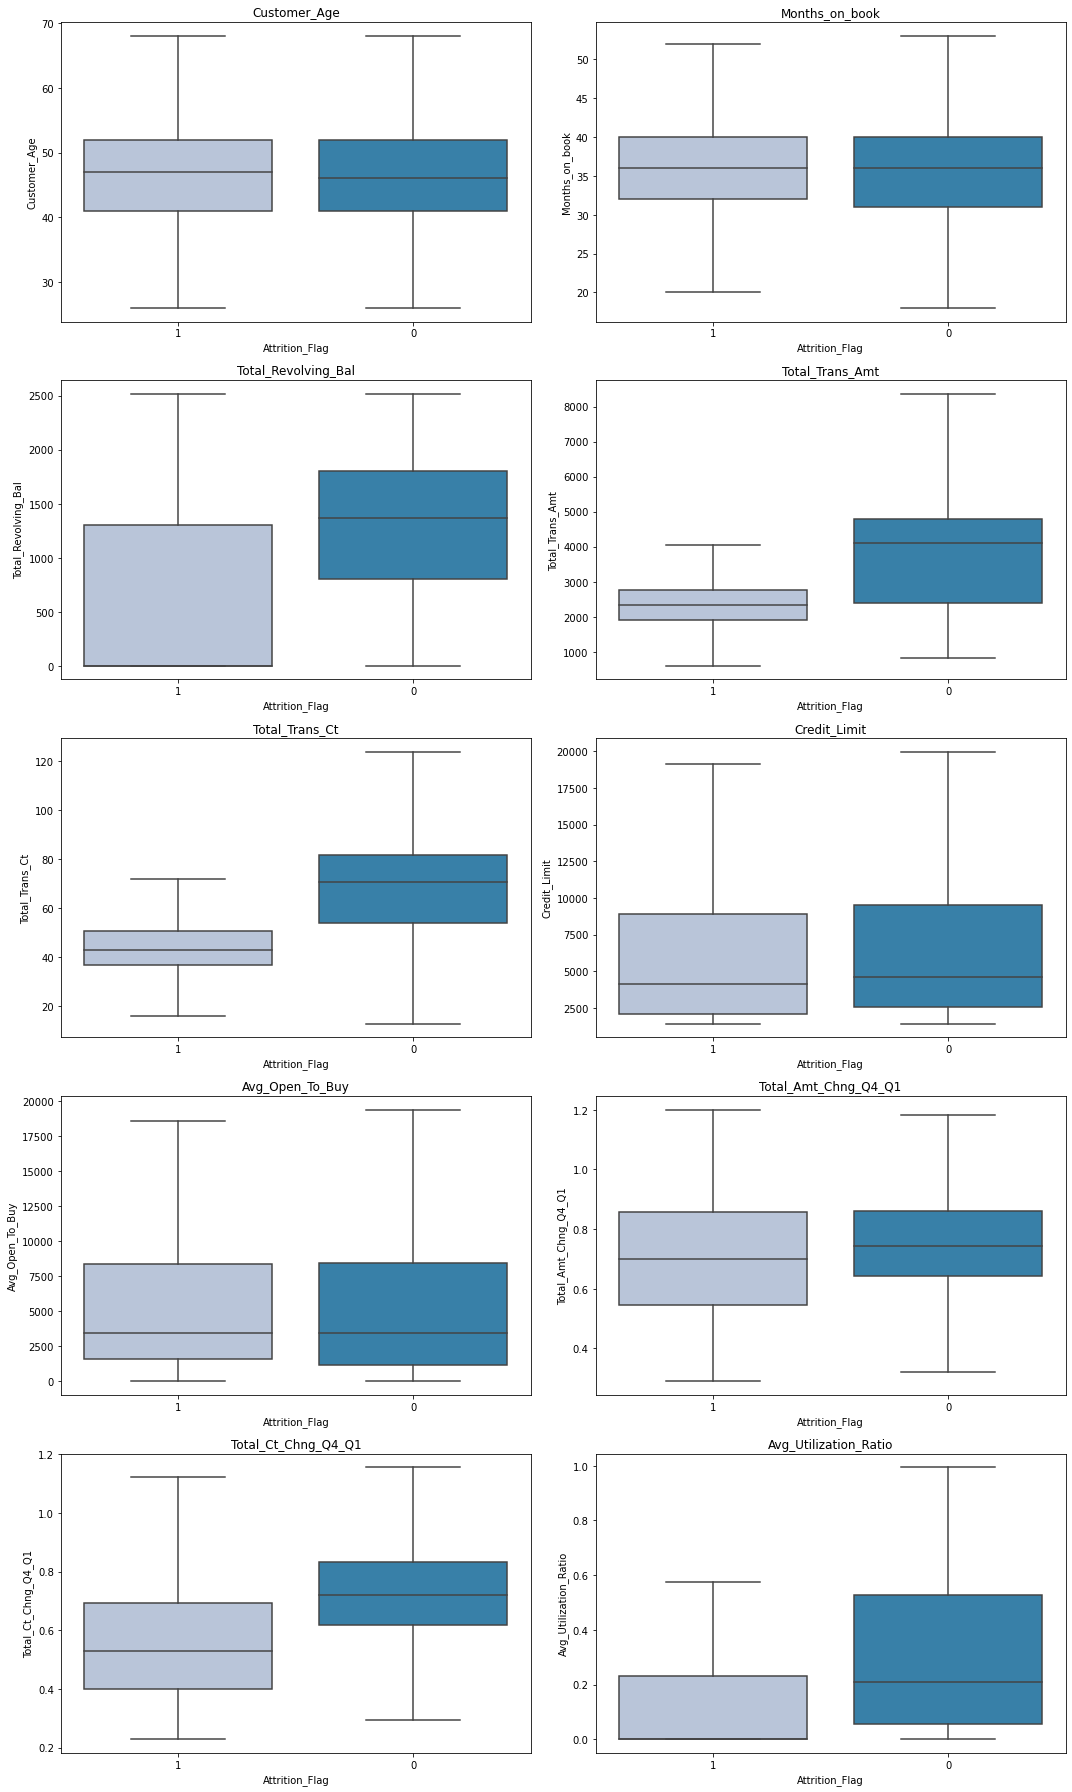

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [317]:
plt.figure(figsize=(15, 25))

for i, variable in enumerate(number_columnNames):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(df["Attrition_Flag"], df[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

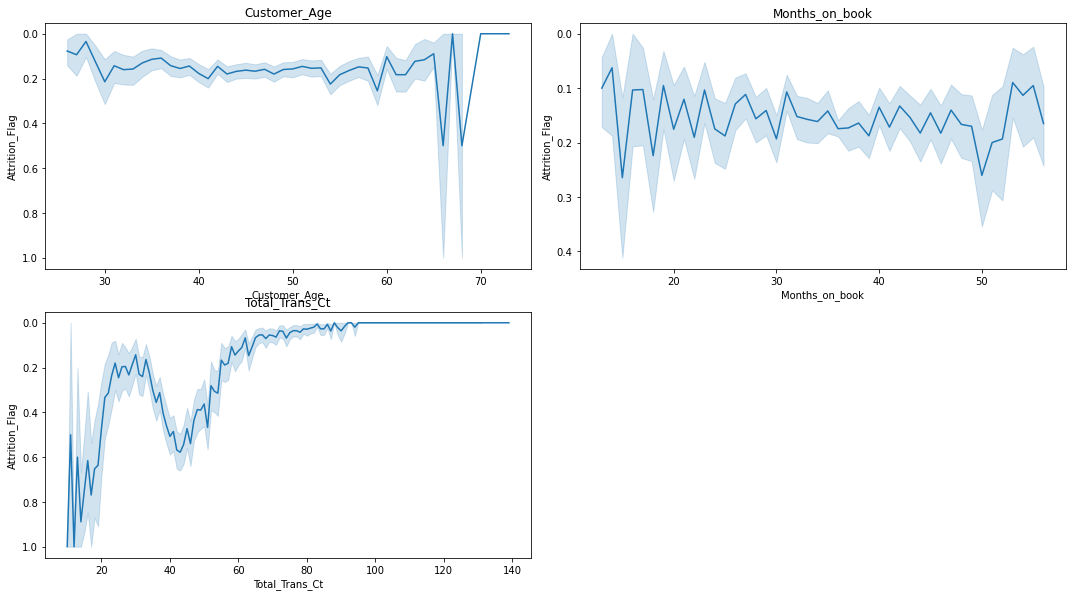

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [318]:
plt.figure(figsize=(15, 20))

line_columnnames=['Customer_Age', 'Months_on_book', 'Total_Trans_Ct']

for i, variable in enumerate(line_columnnames):
    plt.subplot(5, 2, i + 1)
    sns.lineplot(x=variable, y="Attrition_Flag", data=df)
    plt.tight_layout()
    plt.title(variable)
plt.show()


<a id='BivariateNum'> </a>

**Observation:**

*[Click to return to TOC](#summary_home)*


**`Attrition_Flag` vs `Customer Age`**

* Most of the Customers are within the range of the 40-50 and the customers leaving are also within the same range
* We can see that as the age increases, there is a chance of customers exiting

**`Attrition_Flag` vs `Months on Book`**

* Most of the existing customers are within the range of 20-40 age and chance of them exiting is more as age increases or in the initial stages of the relationship

**`Attrition_Flag` vs `Total Revolving Bal`**

* Customers with less revolving balance (0 to 1300) carried over to next month has a higher chance of exiting
* Customers with balance of 700-1800 seem to be continue with the bank

**`Attrition_Flag` vs `Total Trans Amount` vs `Total Trans Ct`** 

* Customers with higher transaction amount have a higher chance on continuing with the bank
* Similarly customers with more transaction done in the month, have a higher chance of continuing with the bank
* The line plot clearly shows that customers with higher transaction counts, continue to exist

**`Attrition_Flag` vs `Credit Limit`**

* Though Credit limit doesnt seem to influence the exit, customers with higher credit limit continue to stay with the bank

**`Attrition_Flag` vs `Avg. Open to Buy`**

* Though Open to buy feature doesnt seem to influence the exit, customers with higher balance to buy continue to stay with the bank

**`Attrition_Flag` vs `Total Amt Change Q4-Q1` vs `Total Ct Change Q4-Q1`** 

* Customers who have done less transactions in Q4 vs Q1 have a higher chance of exiting
* Customers who are active have a higher chanec of continuing with the bank

**`Attrition_Flag` vs `Avg. Utilization Ratio`**

* Customers who have higher credit utilization ratio have a higher chanec of continuing with the bank


<a id="multivariate" > </a>

### Multivariate Analysis - Visualise association with Product Taken & correlation between other Features
*[Click to return to TOC](#summary_home)*

---

<AxesSubplot:>

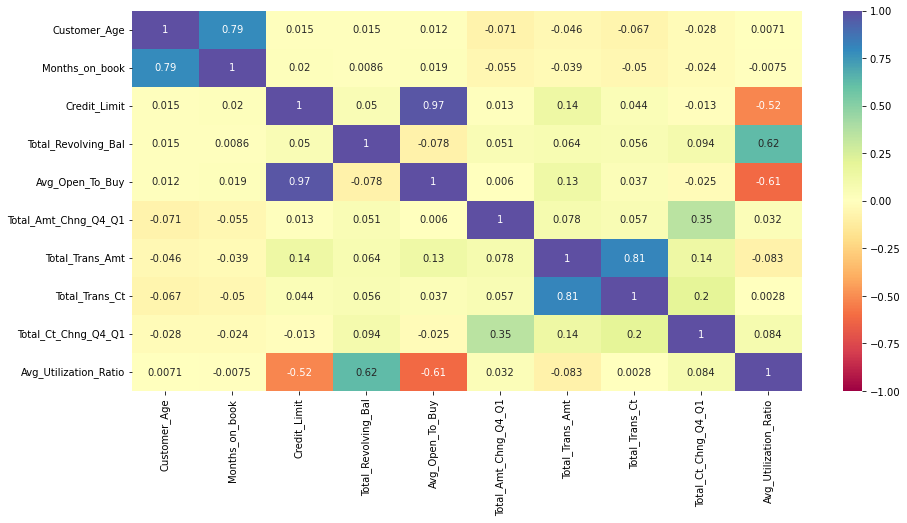

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [319]:
# Plotting Heatmap by creating a 2-D Matrix with correlation plots
correlation = df.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="Spectral")

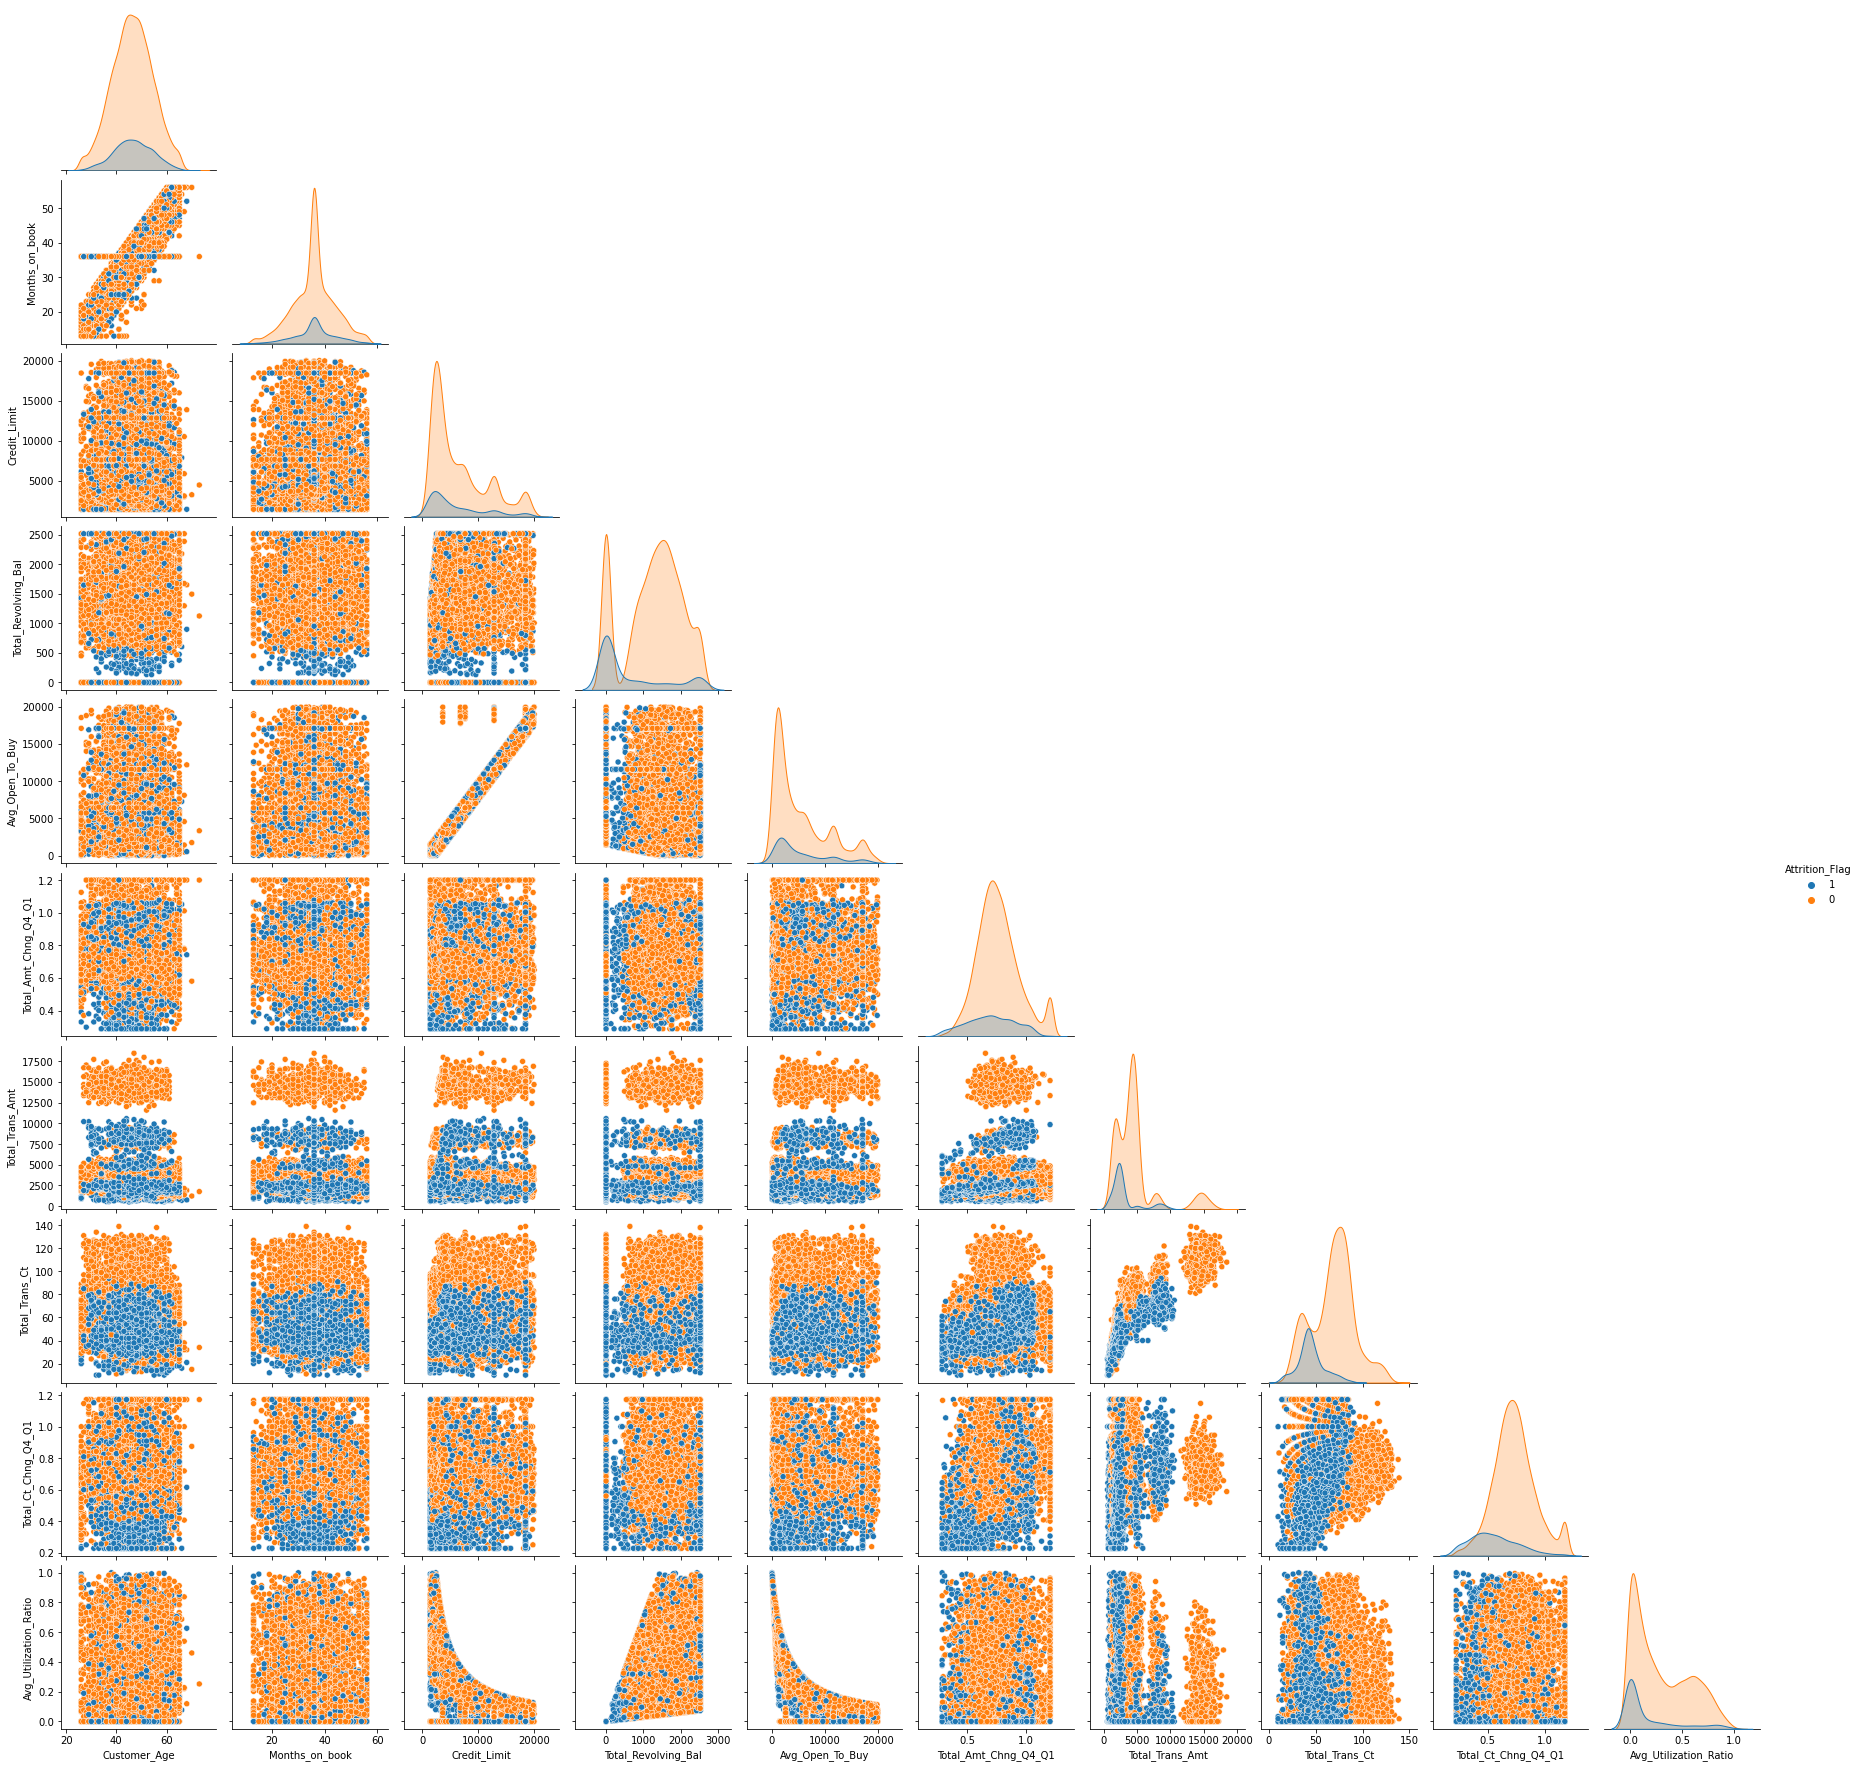

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [320]:
sns.pairplot(df, corner=True, hue="Attrition_Flag")

<a id='BivariateAnalysis1'></a>

**Observations:**

*[Click to return to TOC](#summary_home)*


* `Customer Age` and `Months on Book` has a high correlation which is normal. With increase in age, the number of years in relation to the bank increases
* `Avg_Open_To_Buy` (Amount left on the credit card to use) has negative correlation with `Total Remaining Balance` & `Avg_Utilization_Ratio` which is expected. When revolving balance is high, there will be less credit amount to buy
* `Avg_Open_To_Buy` (Amount left on the credit card to use) has positive correlation with the `Credit Limit`. The more the credit limit, the amount left on the card also is more
* `Credit Limit` has a negative corelation with `Avg_Utilization_Ratio`. When the credit is less, Avg. utilization ratio will be higher since due to the low credit limit most of the amount will be utilized. 
* `Credit Limit` has a positive correlation with `Total Trans Amount`. When the credit limit is less, the Transaction amount to be sent will also be less
* `Total Trans Amount` has a positive correlation with `Avg. Open to Buy`. As the amount available to buy is more, the amount of transactions spent also increases
* `Total Trans Amount` has a positive correlation with `Total_Trans_Ct`. With increase in count of transactions, the amout spent will also increase
* `Avg_Utilization_Ratio` (Amount of credit available spent) has high correlation with `Total Revolving Balance` & has negative correlation with `Avg_Open_To_Buy` which is expected. The revolving balance will be more when the utlization is high which is tems will reduce the credit open to buy 
*  `Total_Ct_Chng_Q4_Q1` has +ve correlation with `Total_Amt_Chng_Q4_Q1`. With increase in count of transactions, the amout spent will also increase
* We see a high chance of attrition when the total Transaction amount spent is less than 10K
* Customers will less transaction count is a sign that they are inactive and possible chances of exiting


**`Card_Category` vs `Income_Category`**

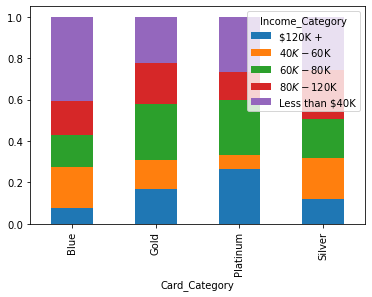

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [321]:
tab = pd.crosstab(df["Card_Category"], df["Income_Category"], normalize="index")
tab.plot(kind="bar", stacked=True)
plt.show()

**Observations:**

* "Less than 40K" customers prefer Blue Card category cards
* "40K - 60K" customers prefer Silver cards 
* "120k+" customers prefer Platinum cards 
* "80K - 120K" customers prefer Gold & Platinum cards


**`Card_Category` vs `Income_Category`**

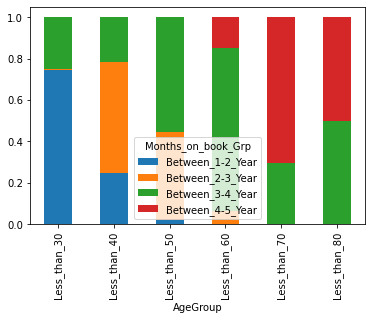

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [322]:
tab = pd.crosstab(df["AgeGroup"], df["Months_on_book_Grp"], normalize="index")
tab.plot(kind="bar", stacked=True)
plt.show()

**Observations:**

* We see the coorelation that as the Age group increases, the Months on the Book group also increases


**`Total_Trans_Amt` vs `Income_Category` vs `Attrition_Flag`**

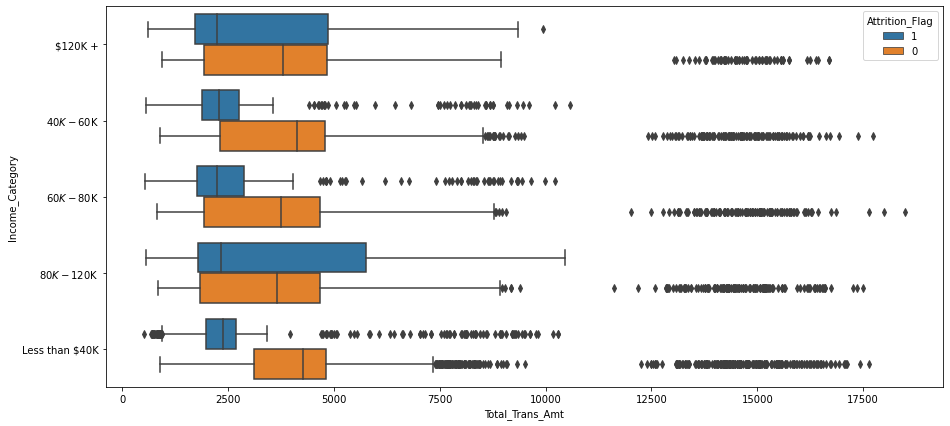

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [323]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Total_Trans_Amt", y="Income_Category", data=df, hue="Attrition_Flag")
plt.show()

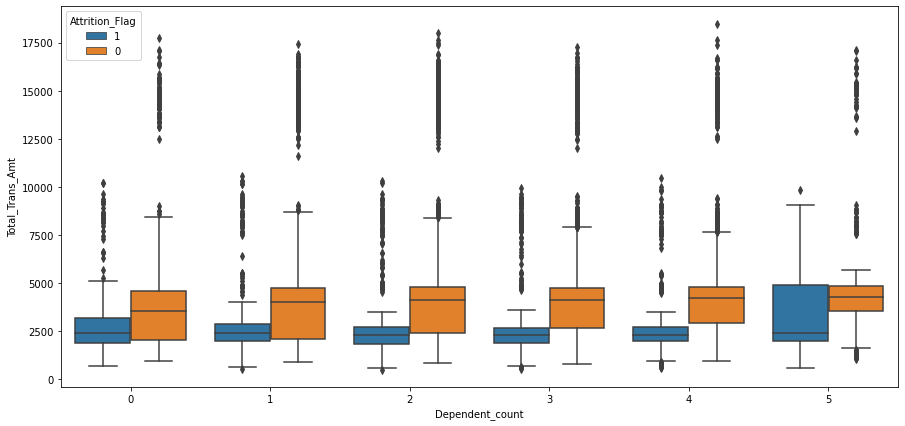

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [324]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Dependent_count", y="Total_Trans_Amt", data=df, hue="Attrition_Flag")
plt.show()

**Observations:**

* When the number of dependents are increasing, the Total trans. amount also increases and also the exit numbers

**`Income Category` vs `Credit_Limit` vs `Customer Age` vs `Attrition_Flag`**

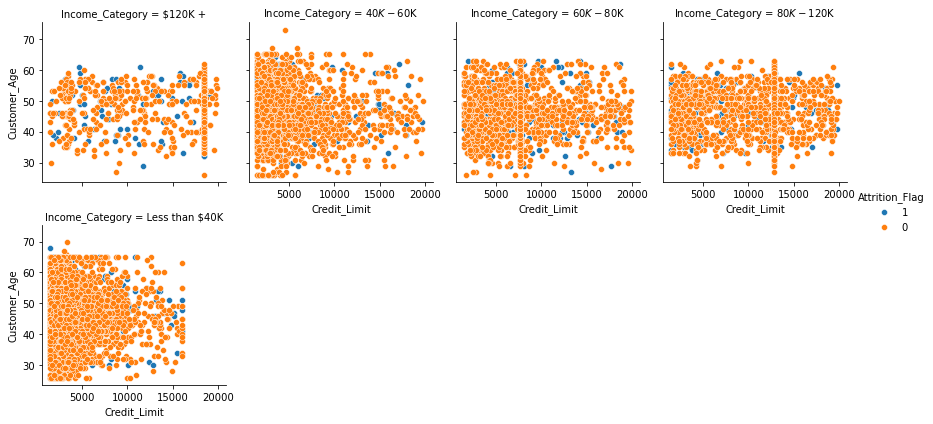

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [325]:
g = sns.FacetGrid(
    df, col="Income_Category", hue="Attrition_Flag", col_wrap=4, margin_titles=True
)
g.map(sns.scatterplot, "Credit_Limit", "Customer_Age")
g.add_legend()

**Observations:**

* More attritions are seen for Income Categories - "120K+"
* Credit limit is more dense within 5000 for income categories - "Less than 40K" & "40K - 60K"
 

**`Income Category` vs `Customer_Age` vs `Total_Trans_Amt` vs `Attrition_Flag`**

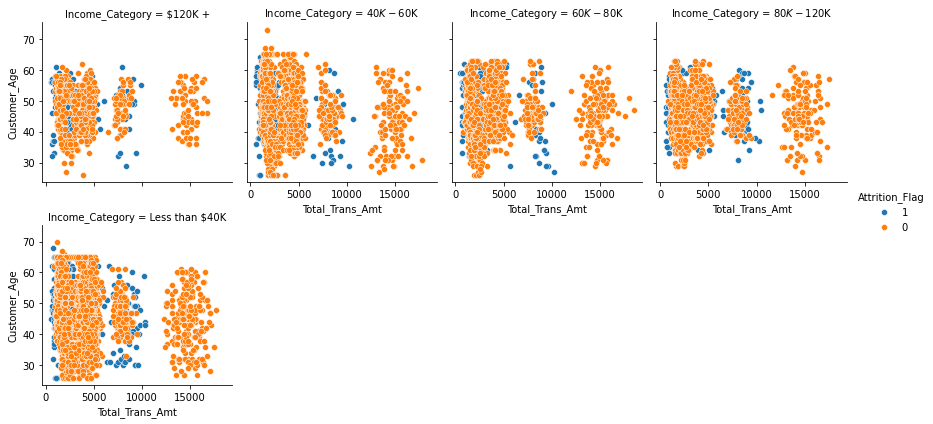

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [326]:
g = sns.FacetGrid(
    df, col="Income_Category", hue="Attrition_Flag", col_wrap=4, margin_titles=True
)
g.map(sns.scatterplot, "Total_Trans_Amt", "Customer_Age")
g.add_legend()

**`Total_Trans_Amt` vs `Card_Category` vs `Attrition_Flag`**

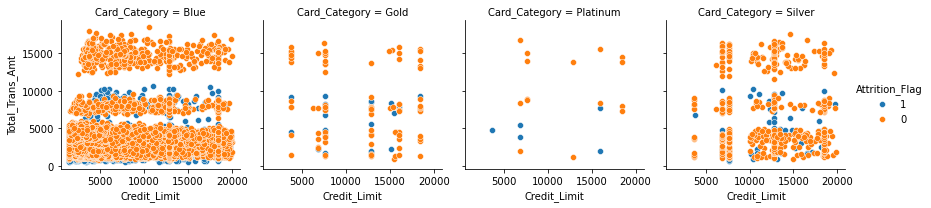

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [327]:
g = sns.FacetGrid(
    df, col="Card_Category", hue="Attrition_Flag", col_wrap=4, margin_titles=True
)
g.map(sns.scatterplot, "Credit_Limit", "Total_Trans_Amt")
g.add_legend()

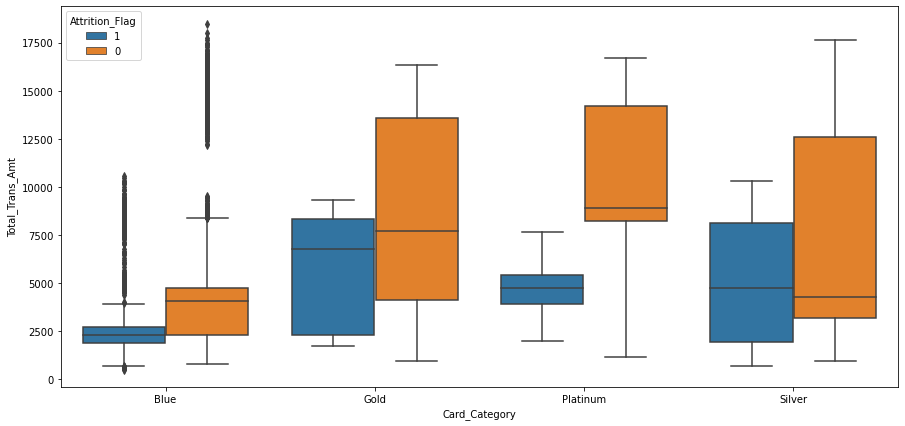

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [328]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Card_Category", y="Total_Trans_Amt", data=df, hue="Attrition_Flag")
plt.show()

**Observations**

* Blue card customers seems to have the less number of Total Trans. Amt with customers with transaction amount around 2500 seem to be exiting
* Blue card exisitng customers seems to be within the range of 2500-5000 card limit. Considering high volume of customers are using Blue cards and the chances of retaining increase with more credit limit, we can look at upgrading the credit limit for the Blue car customers to a higher limit
* Silver & Gold has high number of transation amounts, but customers with less transaction amounts seems to be exiting
* Similarly Platinum users with less transactions are candidates for exit

---

<a id="model"> </a>

## Model Building

##### *[Click to return to TOC](#summary_home)*
 

<a id="prepmodel"> </a>

## Data Preparation for Modeling
 

---

In [329]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1] 
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    #target, pred
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [330]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]  # Probability answer.
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Split Data

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [332]:
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [333]:
# Dropping off the following columns since they will not play a part in determing the model for the customers purchasing the new product
X.drop(["AgeGroup"], axis=1, inplace=True)
X.drop(["Months_on_book_Grp"], axis=1, inplace=True)
X.drop(["Credit_Limit_Grp"], axis=1, inplace=True)
X.drop(["Avg_Utilization_Ratio"], axis=1, inplace=True)
X.drop(["Total_Ct_Chng_Q4_Q1"], axis=1, inplace=True)
X.drop(["Total_Amt_Chng_Q4_Q1"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [334]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 16) (2026, 16) (2026, 16)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Missing Value Treatment

In [335]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cols_to_impute = ["Education_Level", "Marital_Status", "Income_Category"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [336]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct            

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* There are no missing values in any of the columns

In [337]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [338]:
print("Shape of X Training set : ", X_train.shape)
print("Shape of X validation set : ", X_val.shape)
print("Shape of X test set : ", X_test.shape)
print("")

print("Shape of Y Training set : ", y_train.shape)
print("Shape of Y test set : ", y_val.shape)
print("Shape of Y test set : ", y_test.shape)
print("")

print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("")

print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("")

print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of X Training set :  (6075, 44)
Shape of X validation set :  (2026, 44)
Shape of X test set :  (2026, 44)

Shape of Y Training set :  (6075,)
Shape of Y test set :  (2026,)
Shape of Y test set :  (2026,)

Percentage of classes in training set:
0    0.839342
1    0.160658
Name: Attrition_Flag, dtype: float64

Percentage of classes in validation set:
0    0.839092
1    0.160908
Name: Attrition_Flag, dtype: float64

Percentage of classes in test set:
0    0.839585
1    0.160415
Name: Attrition_Flag, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The Training, Validation & Testing set has a similar distribution of the classes & uniformly split

In [339]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 9760 to 413
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    2026 non-null   int64  
 1   Months_on_book                  2026 non-null   int64  
 2   Credit_Limit                    2026 non-null   float64
 3   Total_Revolving_Bal             2026 non-null   int64  
 4   Avg_Open_To_Buy                 2026 non-null   float64
 5   Total_Trans_Amt                 2026 non-null   int64  
 6   Total_Trans_Ct                  2026 non-null   int64  
 7   Gender_M                        2026 non-null   uint8  
 8   Dependent_count_1               2026 non-null   uint8  
 9   Dependent_count_2               2026 non-null   uint8  
 10  Dependent_count_3               2026 non-null   uint8  
 11  Dependent_count_4               2026 non-null   uint8  
 12  Dependent_count_5               

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

<a id="evaluation1"> </a>

## Building the model

##### *[Click to return to TOC](#summary_home)*
 

### Model evaluation criterion:

#### The model can make wrong predictions as:
1. Predicting that the customer will stay with their credit services but customer leaves the credit service - Loss of resources
2. Predicting a customer will leave their credit card services but the customer doesn't leave - Loss of opportunity

#### Which case is more important? 
* Predicting that customer will stay with their credit services but leaves the bank i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when they should be targeted to retain them.

#### How to reduce this loss i.e need to reduce False Negatives?
* The company wants Recall to be maximized, the greater the Recall lesser the chances of false negatives.

<a id="modelorgdata"> </a>

## Model Analysis - Original data

##### *[Click to return to TOC](#summary_home)*
 

In [340]:
models_list = {"Name": [], "CV_Score": [], "Model": []}
# Empty dictionery to store Recall Score Values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [341]:
models1 = []  # Empty list to store all the models
# Appending models into the list
models1.append(
    ("Logistic Regression", LogisticRegression(solver="liblinear", random_state=1))
)
models1.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models1.append(("Bagging", BaggingClassifier(random_state=1)))
models1.append(("Random Forest", RandomForestClassifier(random_state=1)))
models1.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models1.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models1.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score1 = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models1:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)  
    models_list["Name"].append(name)
    models_list["CV_Score"].append(cv_result.mean() * 100)
    models_list["Model"].append(model)
    print("{}: {}".format(name, cv_result.mean() * 100))

    
print("\n" "Recall Score - Validation Performance:" "\n")

for name, model in models1:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    score1.append(scores)    
    print("{}: {}".format(name, scores))



Cross-Validation Performance:

Logistic Regression: 32.38147566718995
Decision Tree: 74.17687074829932
Bagging: 73.04918890633176
Random Forest: 65.36630036630036
Gradient Boost: 78.06750392464677
Adaboost: 76.9403453689168
Xgboost: 79.91313448456306

Recall Score - Validation Performance:

Logistic Regression: 50.920245398773
Decision Tree: 76.38036809815951
Bagging: 76.38036809815951
Random Forest: 69.01840490797547
Gradient Boost: 79.4478527607362
Adaboost: 80.98159509202453
Xgboost: 83.74233128834356


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

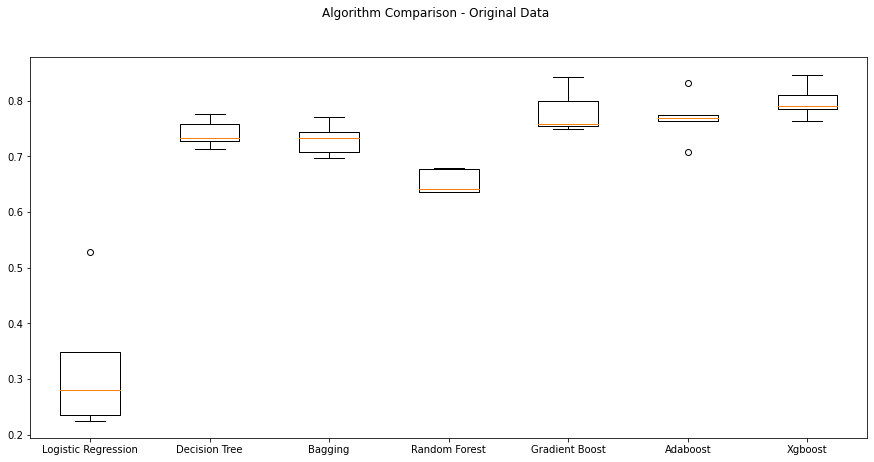

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [342]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison - Original Data")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that XGBoost is giving the highest cross-validated recall followed by Gradient Boost, Adaboost and then Decision Tree 
- The boxplot shows that the performance of XGBoost, Gradient Boost and Decision tree is consistent without any outliers and their performance on the validation set is also good. Adaboost has some outliers


---


## Oversampling training data using SMOTE
---

In [343]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 976
Before OverSampling, count of label '0': 5099 

After OverSampling, count of label '1': 5099
After OverSampling, count of label '0': 5099 

After OverSampling, the shape of train_X: (10198, 44)
After OverSampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id="modeloverdata"> </a>

## Model Analysis - Oversampling data

##### *[Click to return to TOC](#summary_home)*
 

In [344]:
models2 = []  # Empty list to store all the models

# Appending models into the list
models2.append(
    ("Over Logistic Regression", LogisticRegression(solver="liblinear", random_state=1))
)
models2.append(("Over Decision Tree", DecisionTreeClassifier(random_state=1)))
models2.append(("Over Bagging", BaggingClassifier(random_state=1)))
models2.append(("Over Random Forest", RandomForestClassifier(random_state=1)))
models2.append(("Over Gradient Boost", GradientBoostingClassifier(random_state=1)))
models2.append(("Over Adaboost", AdaBoostClassifier(random_state=1)))
models2.append(("Over Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score2 = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models2:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    models_list["Name"].append(name)
    models_list["CV_Score"].append(cv_result.mean() * 100)
    models_list["Model"].append(model)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Recall Score - Validation Performance:" "\n")

for name, model in models2:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    score2.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Over Logistic Regression: 90.15520791240932
Over Decision Tree: 94.31268640920548
Over Bagging: 95.15626623564047
Over Random Forest: 95.74448228751756
Over Gradient Boost: 96.33281379283804
Over Adaboost: 96.1562469933999
Over Xgboost: 96.70532432796473

Recall Score - Validation Performance:

Over Logistic Regression: 58.58895705521472
Over Decision Tree: 76.68711656441718
Over Bagging: 78.52760736196319
Over Random Forest: 72.39263803680981
Over Gradient Boost: 85.2760736196319
Over Adaboost: 82.82208588957054
Over Xgboost: 85.58282208588957


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

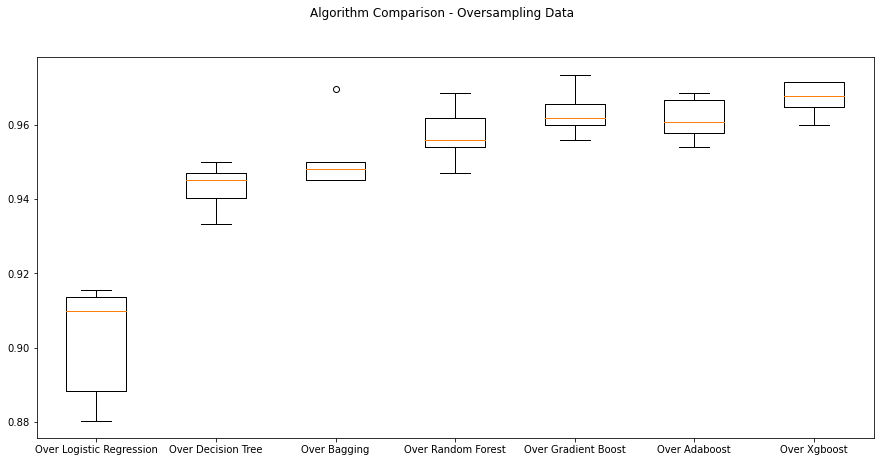

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [345]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison - Oversampling Data")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that the XGBoost is giving the highest cross-validated recall followed by Gradient Boost, Adaboost and then Random Forest
- The boxplot shows that the performance of Gradient Boost, Adaboost & Random Forest is consistent without any outliers and their performance on the validation set is also good. 


## Undersampling training data using Random Undersampler

In [346]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label '1': 976
Before Under Sampling, count of label '0': 5099 

After Under Sampling, count of label '1': 976
After Under Sampling, count of label '0': 976 

After Under Sampling, the shape of train_X: (1952, 44)
After Under Sampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id="modelunderdata"> </a>

## Model Analysis - Undersampling data

##### *[Click to return to TOC](#summary_home)*
 

In [347]:
models3 = []  # Empty list to store all the models

# Appending models into the list
models3.append(
    (
        "Under Logistic Regression",
        LogisticRegression(solver="liblinear", random_state=1),
    )
)
models3.append(("Under Decision Tree", DecisionTreeClassifier(random_state=1)))
models3.append(("Under Bagging", BaggingClassifier(random_state=1)))
models3.append(("Under Random Forest", RandomForestClassifier(random_state=1)))
models3.append(("Under Gradient Boost", GradientBoostingClassifier(random_state=1)))
models3.append(("Under Adaboost", AdaBoostClassifier(random_state=1)))
models3.append(("Under Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score3 = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models3:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    models_list["Name"].append(name)
    models_list["CV_Score"].append(cv_result.mean() * 100)
    models_list["Model"].append(model)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Recall Score - Validation Performance:" "\n")

for name, model in models3:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    score3.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Under Logistic Regression: 83.91732077446363
Under Decision Tree: 87.09105180533753
Under Bagging: 89.03976975405548
Under Random Forest: 90.98482469911042
Under Gradient Boost: 92.72736787022501
Under Adaboost: 91.70329670329672
Under Xgboost: 92.31711145996861

Recall Score - Validation Performance:

Under Logistic Regression: 84.66257668711657
Under Decision Tree: 89.2638036809816
Under Bagging: 89.87730061349694
Under Random Forest: 92.33128834355828
Under Gradient Boost: 91.71779141104295
Under Adaboost: 92.02453987730061
Under Xgboost: 93.86503067484662


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

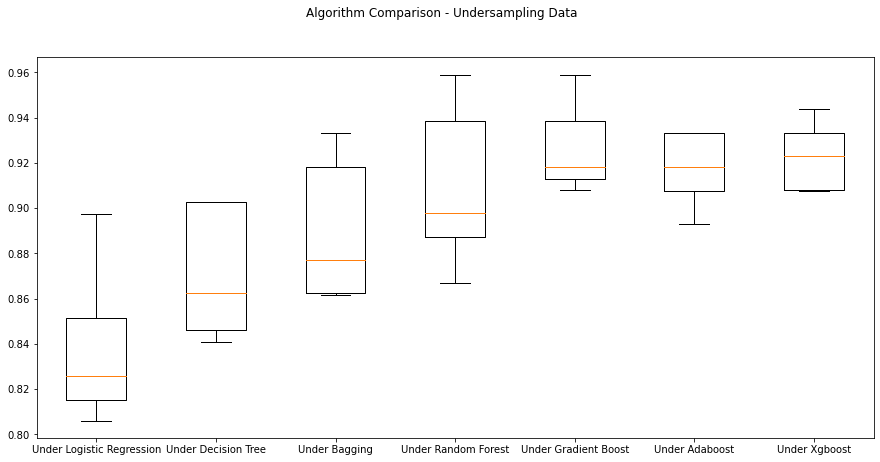

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [348]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(15, 7))

fig.suptitle("Algorithm Comparison - Undersampling Data")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that the Gradient Boost is giving the highest cross-validated recall followed by XGBoost, Adaboost and then Random Forest  
- The boxplot shows that the performance of XGBoost, Random Forest and Adaboost is consistent without any outliers and their performance on the validation set is also good


<a id="modelcomp"> </a>

## Comparison Models with - Original vs Oversample vs Undersample  Data - 21 models

Picking 3 best models from the 7 x 3 Matrix (Regular Set, Over Sampling Set & Under Sampling Set)

In [349]:
models_df = pd.DataFrame(models_list)
models_df.sort_values(by=["CV_Score"], ascending=False)


Name   CV_Score  \
13               Over Xgboost  96.705324   
11        Over Gradient Boost  96.332814   
12              Over Adaboost  96.156247   
10         Over Random Forest  95.744482   
9                Over Bagging  95.156266   
8          Over Decision Tree  94.312686   
18       Under Gradient Boost  92.727368   
20              Under Xgboost  92.317111   
19             Under Adaboost  91.703297   
17        Under Random Forest  90.984825   
7    Over Logistic Regression  90.155208   
16              Under Bagging  89.039770   
15        Under Decision Tree  87.091052   
14  Under Logistic Regression  83.917321   
6                     Xgboost  79.913134   
4              Gradient Boost  78.067504   
5                    Adaboost  76.940345   
1               Decision Tree  74.176871   
2                     Bagging  73.049189   
3               Random Forest  65.366300   
0         Logistic Regression  32.381476   

                                                Model  
13  XGBClassifier(base_score=0.5, booster='gbtree'...  
11  ([DecisionTreeRegressor(criterion='friedman_ms...  
12  (DecisionTreeClassifier(max_depth=1, random_st...  
10  (DecisionTreeClassifier(max_features='auto', r...  
9   (DecisionTreeClassifier(random_state=102886208...  
8              DecisionTreeClassifier(random_state=1)  
18  ([DecisionTreeRegressor(criterion='friedman_ms...  
20  XGBClassifier(base_score=0.5, booster='gbtree'...  
19  (DecisionTreeClassifier(max_depth=1, random_st...  
17  (DecisionTreeClassifier(max_features='auto', r...  
7   LogisticRegression(random_state=1, solver='lib...  
16  (DecisionTreeClassifier(random_state=102886208...  
15             DecisionTreeClassifier(random_state=1)  
14  LogisticRegression(random_state=1, solver='lib...  
6   XGBClassifier(base_score=0.5, booster='gbtree'...  
4   ([DecisionTreeRegressor(criterion='friedman_ms...  
5   (DecisionTreeClassifier(max_depth=1, random_st...  
1              DecisionTreeClassifier(random_state=1)  
2   (DecisionTreeClassifier(random_state=102886208...  
3   (DecisionTreeClassifier(max_features='auto', r...  
0   LogisticRegression(random_state=1, solver='lib...

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Based on the above comparison, the following models have the best performing Recall scores in the order mentioned below:

     **1. "Over XG Boost" (96.71 %)**
     
     **2. "Over Gradient Boost" (96.33 %)**  
     
     **3. "Over AdaBoost" (96.16 %)** 

       
* We will tune these models further

---

<a id="adaboost"> </a>

##   Adaboost 

**Grid Search**

In [350]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over, y_train_over)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)


# Set the clf to the best combination of parameters
adb_tuned1 = grid_cv.best_estimator_

# Fit the model on training data
adb_tuned1.fit(X_train_over, y_train_over)


Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'learning_rate': 0.05, 'n_estimators': 30} 
Score: 0.9321518597625508
Wall time: 3min 18s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=30, random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Checking model performance**

In [351]:
# Calculating different metrics on train set
Adaboost_grid_train = model_performance_classification_sklearn_with_threshold(
    adb_tuned1, X_train_over, y_train_over
)
print("Training performance:")
print(Adaboost_grid_train)

print("*************************************")

Adaboost_grid_val = model_performance_classification_sklearn_with_threshold(
    adb_tuned1, X_val, y_val
)
print("Validation performance:")
print(Adaboost_grid_val)


Training performance:
   Accuracy    Recall  Precision        F1
0  0.939498  0.963718   0.919192  0.940929
*************************************
Validation performance:
   Accuracy    Recall  Precision        F1
0  0.911155  0.871166   0.672986  0.759358


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

* The validation recall has reduced in comparison to the validation recall on model with default parameters
* The tuned model recall is generalizing well with the training data
* The Testing Accuracy score is also high 


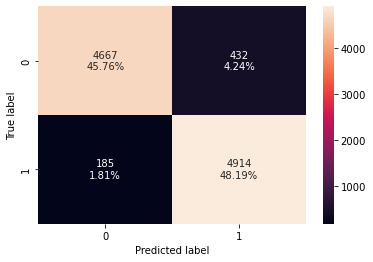

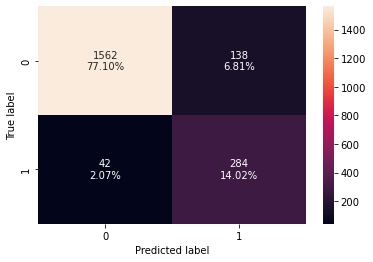

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [352]:
# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(adb_tuned1, X_train_over, y_train_over)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(adb_tuned1, X_val, y_val)

**Randomized Search** 

In [353]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


# Set the clf to the best combination of parameters
adb_tuned2 = randomized_cv.best_estimator_

# Fit the model on training data
adb_tuned2.fit(X_train_over, y_train_over)


Best parameters are {'n_estimators': 10, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9305853489580326:
Wall time: 1min 7s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=10, random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Checking model performance**

In [354]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn_with_threshold(
    adb_tuned2, X_train_over, y_train_over
)
print("Training performance:")
print(Adaboost_random_train)

print("*************************************")

Adaboost_random_val = model_performance_classification_sklearn_with_threshold(
    adb_tuned2, X_val, y_val
)
print("Validation performance:")
print(Adaboost_random_val)


Training performance:
   Accuracy    Recall  Precision        F1
0   0.94695  0.964699   0.931629  0.947876
*************************************
Validation performance:
   Accuracy    Recall  Precision        F1
0  0.916091  0.855828    0.69403  0.766484


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

* The validation recall has reduced in comparison to the validation recall on model with default parameters
* The tuned model recall is generalizing well with the training data
* The Testing Accuracy & Recall score of Random model is high when compared with the Grid model 


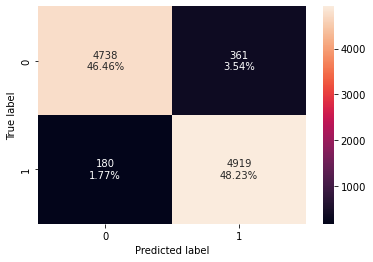

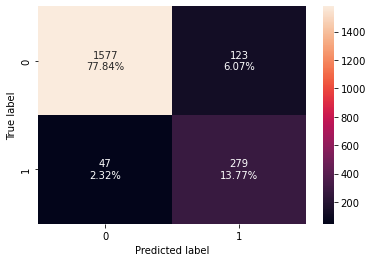

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [355]:
# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(adb_tuned2, X_train_over, y_train_over)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(adb_tuned2, X_val, y_val)

<a id="gradient"> </a>

##   Gradient Boost 

**Grid Search**

In [356]:
%%time 

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1],
    "max_depth": [3, 5, 7],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over, y_train_over)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)


# Set the clf to the best combination of parameters
gb_tuned1 = grid_cv.best_estimator_

# Fit the model on training data
gb_tuned1.fit(X_train_over, y_train_over)


Best Parameters:{'max_depth': 7, 'max_features': 0.9, 'n_estimators': 100, 'subsample': 1} 
Score: 0.9149015759395024
Wall time: 13min 58s


GradientBoostingClassifier(max_depth=7, max_features=0.9, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Checking model performance**

In [357]:
# Calculating different metrics on train set
GB_grid_train = model_performance_classification_sklearn_with_threshold(
    gb_tuned1, X_train_over, y_train_over
)
print("Training performance:")
print(GB_grid_train)

print("*************************************")

GB_grid_val = model_performance_classification_sklearn_with_threshold(
    gb_tuned1, X_val, y_val
)
print("Validation performance:")
print(GB_grid_val)


Training performance:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
*************************************
Validation performance:
   Accuracy    Recall  Precision        F1
0  0.950642  0.849693   0.844512  0.847095


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

* The validation recall has reduced in comparison to the validation recall on model with default parameters
* The tuned model recall is overfitting with the training data


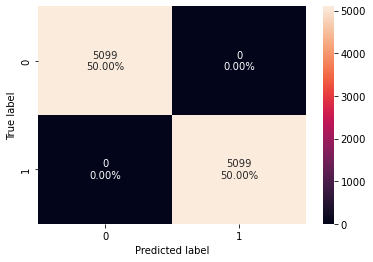

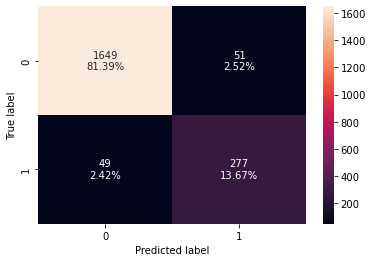

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [358]:
# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(gb_tuned1, X_train_over, y_train_over)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(gb_tuned1, X_val, y_val)


**Randomized Search** 

In [359]:
%%time 

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1],
    "max_depth": [3, 5, 7],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

# Set the clf to the best combination of parameters
gb_tuned2 = randomized_cv.best_estimator_

# Fit the model on training data
gb_tuned2.fit(X_train_over, y_train_over)


Best parameters are {'subsample': 1, 'n_estimators': 100, 'max_features': 0.7, 'max_depth': 7} with CV score=0.9129405992033712:
Wall time: 4min 18s


GradientBoostingClassifier(max_depth=7, max_features=0.7, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Checking model performance**

In [360]:
# Calculating different metrics on train set
GB_random_train = model_performance_classification_sklearn_with_threshold(
    gb_tuned2, X_train_over, y_train_over
)
print("Training performance:")
print(GB_random_train)

print("*************************************")

GB_random_val = model_performance_classification_sklearn_with_threshold(
    gb_tuned2, X_val, y_val
)
print("Validation performance:")
print(GB_random_val)


Training performance:
   Accuracy    Recall  Precision        F1
0  0.999902  0.999804        1.0  0.999902
*************************************
Validation performance:
   Accuracy    Recall  Precision        F1
0  0.950148  0.837423   0.850467  0.843895


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

* The validation recall has reduced in comparison to the validation recall on model with default parameters
* The tuned model recall is generalizing with the training data, though the training data recall is overfitting 


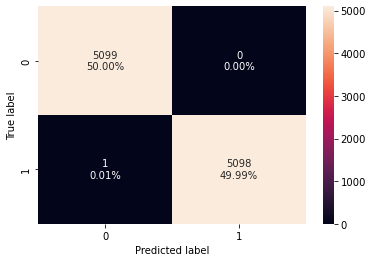

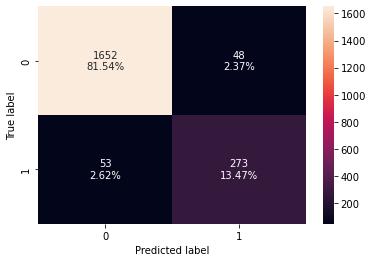

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [361]:
# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(gb_tuned2, X_train_over, y_train_over)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(gb_tuned2, X_val, y_val)

<a id="xgboost"> </a>


##   XGBoost 

**Grid Search**

In [362]:
%%time 

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={
        'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[5,10],
            'learning_rate':[0.01,0.1],
            'gamma':[0,1,3],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSearchCV
grid_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

xgb_tuned1 = grid_cv.best_estimator_

xgb_tuned1.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100, 'scale_pos_weight': 10, 'subsample': 0.8} with CV score=0.9986274509803922:
Wall time: 10min 5s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=2, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [363]:
# Calculating different metrics on train set
xgboost_grid_train = model_performance_classification_sklearn_with_threshold(
    xgb_tuned1, X_train_over, y_train_over
)
print("Training performance:")
print(xgboost_grid_train)

print("*************************************")

xgboost_grid_val = model_performance_classification_sklearn_with_threshold(
    xgb_tuned1, X_val, y_val
)
print("Validation performance:")
print(xgboost_grid_train)


Training performance:
   Accuracy    Recall  Precision        F1
0  0.707197  0.999804   0.630706  0.773479
*************************************
Validation performance:
   Accuracy    Recall  Precision        F1
0  0.707197  0.999804   0.630706  0.773479


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

* The validation recall has increased in comparison to the validation recall on model with default parameters
* The tuned model recall is overfitting 
* The accuracy as also reduced
 

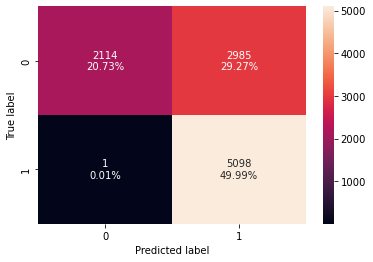

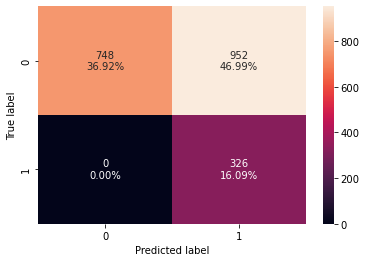

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [364]:
# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(xgb_tuned1, X_train_over, y_train_over)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(xgb_tuned1, X_val, y_val)


**Randomized Search** 

In [365]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={
        'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[5,10],
            'learning_rate':[0.01,0.1],
            'gamma':[0,1,3],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

xgb_tuned2 = randomized_cv.best_estimator_

xgb_tuned2.fit(X_train_over, y_train_over)

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9972549019607844:
Wall time: 1min 37s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=1, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [366]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn_with_threshold(
    xgb_tuned2, X_train_over, y_train_over
)
print("Training performance:")
print(xgboost_random_train)

print("*************************************")

xgboost_random_val = model_performance_classification_sklearn_with_threshold(
    xgb_tuned2, X_val, y_val
)
print("Validation performance:")
print(xgboost_random_val)


Training performance:
   Accuracy    Recall  Precision        F1
0  0.651696  0.998431   0.589577  0.741372
*************************************
Validation performance:
   Accuracy   Recall  Precision        F1
0  0.405726  0.98773   0.211564  0.348485


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

* The validation recall has increased in comparison to the validation recall on model with default parameters
* The tuned model recall is overfitting 
* The accuracy has dropped considerably 

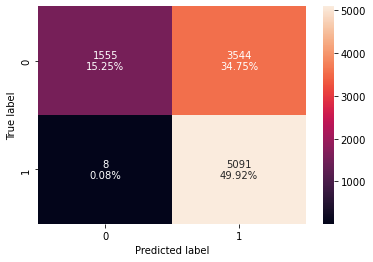

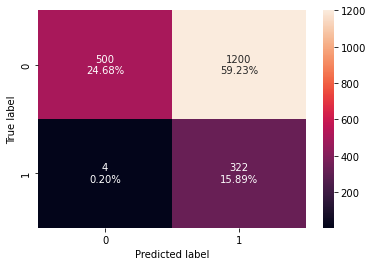

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [367]:
# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(xgb_tuned2, X_train_over, y_train_over)

# Creating confusion matrix
confusion_matrix_sklearn_with_threshold(xgb_tuned2, X_val, y_val)

###  Comparing all models 

In [368]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Adaboost_grid_train.T,
        Adaboost_random_train.T,
        GB_grid_train.T,
        GB_random_train.T,
        xgboost_grid_train.T,
        xgboost_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Adaboost Grid",
    "Adaboost Random",
    "Gradient Grid",
    "Gradient Random",
    "XGBoost Grid",
    "XGBoost Random",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Adaboost Grid  Adaboost Random  Gradient Grid  Gradient Random  \
Accuracy        0.939498         0.946950            1.0         0.999902   
Recall          0.963718         0.964699            1.0         0.999804   
Precision       0.919192         0.931629            1.0         1.000000   
F1              0.940929         0.947876            1.0         0.999902   

           XGBoost Grid  XGBoost Random  
Accuracy       0.707197        0.651696  
Recall         0.999804        0.998431  
Precision      0.630706        0.589577  
F1             0.773479        0.741372

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [369]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Adaboost_grid_val.T,
        Adaboost_random_val.T,
        GB_grid_val.T,
        GB_random_val.T,
        xgboost_grid_val.T,
        xgboost_random_val.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Adaboost Grid",
    "Adaboost Random",
    "Gradient Grid",
    "Gradient Random",
    "XGBoost Grid",
    "XGBoost Random",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


Adaboost Grid  Adaboost Random  Gradient Grid  Gradient Random  \
Accuracy        0.911155         0.916091       0.950642         0.950148   
Recall          0.871166         0.855828       0.849693         0.837423   
Precision       0.672986         0.694030       0.844512         0.850467   
F1              0.759358         0.766484       0.847095         0.843895   

           XGBoost Grid  XGBoost Random  
Accuracy       0.530109        0.405726  
Recall         1.000000        0.987730  
Precision      0.255086        0.211564  
F1             0.406484        0.348485

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

* On comparing the Recall metrics of the training score vs Validations scores, we infer

    - XGBoost Random has the next best Recall score but the accurance has dropped
    - XGBoost Grid has the highest Recall score, but the validation seems to be overfitting with testing data and not genralized well
    - Gradient Random is having a better score, but not generalized well with validation data
    - Gradient Grid is overfitting the data
    - AdaBoost Grid & AdaBoost Random metrics for the validation data are generalizing well with the training data  . When compared with the accuracy metric, AdaBoost Random has a better Accuracy
  
    #### We will consider AdaBoost Random as the best model without overfitting & accuracy when compared with the other models
       
  

---

<a id="mptest"> </a>

### Model Performance on Test dataset

* Though AdaBoost Random has been considerd as the best model, considering the Recall scores are close for most of the models, we will apply the Test data on each models to validate the assumption

In [370]:
# Calculating different metrics on the test set
AdaBoost_Grid_test = model_performance_classification_sklearn_with_threshold(
    adb_tuned1, X_test, y_test
)

# Calculating different metrics on the test set
AdaBoost_Random_test = model_performance_classification_sklearn_with_threshold(
    adb_tuned2, X_test, y_test
)

# Calculating different metrics on the test set
GB_Grid_test = model_performance_classification_sklearn_with_threshold(
    gb_tuned1, X_test, y_test
)

# Calculating different metrics on the test set
GB_Random_test = model_performance_classification_sklearn_with_threshold(
    gb_tuned2, X_test, y_test
)

# Calculating different metrics on the test set
XGB_Grid_test = model_performance_classification_sklearn_with_threshold(
    xgb_tuned1, X_test, y_test
)

# Calculating different metrics on the test set
XGB_Random_test = model_performance_classification_sklearn_with_threshold(
    xgb_tuned2, X_test, y_test
)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Comparing the Training vs Testing data

In [371]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Adaboost_grid_train.T,
        Adaboost_random_train.T,
        GB_grid_train.T,
        GB_random_train.T,
        xgboost_grid_train.T,
        xgboost_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Adaboost Grid",
    "Adaboost Random",
    "Gradient Grid",
    "Gradient Random",
    "XGBoost Grid",
    "XGBoost Random",
]
print("Training performance comparison:")
print(models_train_comp_df)

# Testing performance comparison

models_train_comp_df = pd.concat(
    [
        AdaBoost_Grid_test.T,
        AdaBoost_Random_test.T,
        GB_Grid_test.T,
        GB_Random_test.T,
        XGB_Grid_test.T,
        XGB_Random_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Adaboost Grid",
    "Adaboost Random",
    "Gradient Grid",
    "Gradient Random",
    "XGBoost Grid",
    "XGBoost Random",
]

print("\n\n")
print("Training performance comparison:")
print(models_train_comp_df)

Training performance comparison:
           Adaboost Grid  Adaboost Random  Gradient Grid  Gradient Random  \
Accuracy        0.939498         0.946950            1.0         0.999902   
Recall          0.963718         0.964699            1.0         0.999804   
Precision       0.919192         0.931629            1.0         1.000000   
F1              0.940929         0.947876            1.0         0.999902   

           XGBoost Grid  XGBoost Random  
Accuracy       0.707197        0.651696  
Recall         0.999804        0.998431  
Precision      0.630706        0.589577  
F1             0.773479        0.741372  



Training performance comparison:
           Adaboost Grid  Adaboost Random  Gradient Grid  Gradient Random  \
Accuracy        0.905726         0.917078       0.958539         0.960020   
Recall          0.898462         0.889231       0.886154         0.883077   
Precision       0.648889         0.686461       0.859701         0.869697   
F1              0.753548   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

    - XGBoost Grid & XGBoost Random: Accuracy has dropped significantly on Test data when compared with Train data proving that the model is overfitting though this model has highest Recall scores
    - Gradient Grid: The model is overfitting with the data
    - Gradient Random: Test data is not well generalized and close to overfitting
    - AdaBoost Grid & AdaBoost Random: Test data is generalizing well with the train data and Accuracy is also good. Considering Accuracy, next to Recall metric, AdaBoost Random is being considered as the better model among others

  
   #### Based on the earlier inference, we will consider AdaBoost Random as the best model without overfitting & good accuracy when compared with the other models and will use it for the further analysis


---
         

In [372]:
### Feature Importance Using Sklearn

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

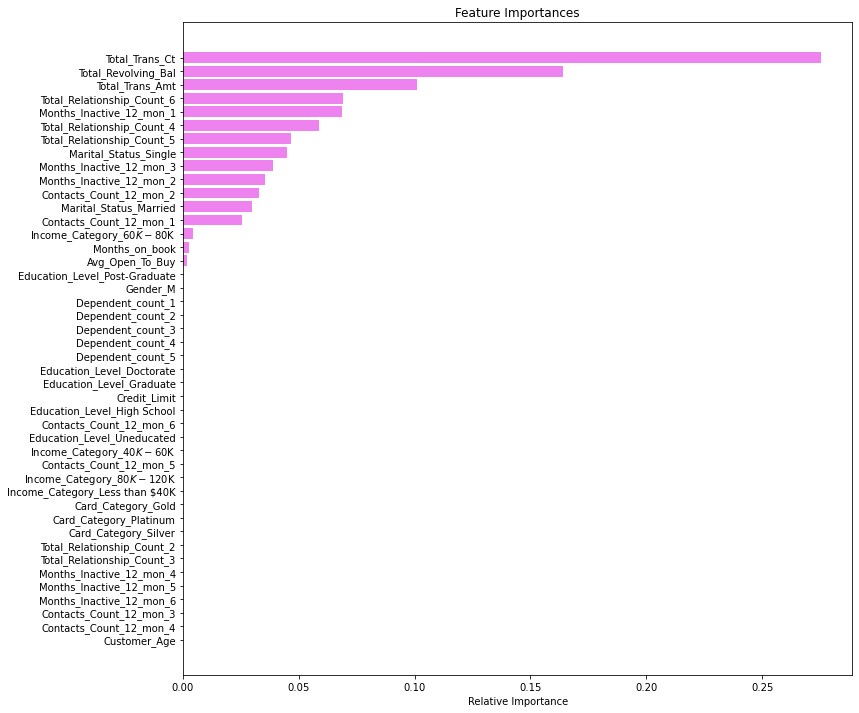

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [373]:
feature_names = X_test.columns
importances = adb_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

####  Observations 

- Total Trans Ct, total Revolving Balance, Total Trans Amt,  are the top two features of importance considered in this model
- Months Inactive, Total Relation ship & Marital status are the other features of importance

<a id="pipeline"> </a>

###  Pipelines for productionizing the model 

In [455]:
# Separating target variable and other variables
pX = df.drop(["Attrition_Flag"], axis=1)
pY = df["Attrition_Flag"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [456]:
pX.drop(["AgeGroup"], axis=1, inplace=True)
pX.drop(["Months_on_book_Grp"], axis=1, inplace=True)
pX.drop(["Credit_Limit_Grp"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [457]:
# Identofying the category columns
category_columnNames = pX.describe(include=["category"]).columns
category_columnNames

Index(['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [458]:
# Identifying the numerical columns
number_columnNames = (
    pX.describe(include=["int64"]).columns.tolist()
    + pX.describe(include=["float64"]).columns.tolist()
)
number_columnNames

['Customer_Age',
 'Months_on_book',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Credit_Limit',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [459]:

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, number_columnNames),
        ("cat", categorical_transformer, category_columnNames),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [460]:
# Splitting the data into train and test sets
XX_train, XX_test, yy_train, yy_test = train_test_split(
    pX, pY, test_size=0.30, random_state=1, stratify=y
)
print(XX_train.shape, XX_test.shape)

(7088, 19) (3039, 19)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [461]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "AB",
            AdaBoostClassifier(
                random_state=1,
                n_estimators=10,
                learning_rate=0.2,
                base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(XX_train, yy_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Total_Revolving_Bal',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Credit_Limit',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Ct_Chng_Q4_Q1',
                                          

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [462]:
XX_test["model_predictions"] = model.predict(XX_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [463]:
XX_test[XX_test["model_predictions"] == 1]

Customer_Age Gender Dependent_count Education_Level Marital_Status  \
2005             39      M               2      Uneducated        Married   
6543             38      F               3        Graduate         Single   
4483             49      M               5      Uneducated            NaN   
4983             45      M               2         College         Single   
1743             58      F               1      Uneducated        Married   
8550             56      F               3     High School            NaN   
4108             49      M               1             NaN         Single   
10089            52      F               5             NaN        Married   
3168             47      M               3      Uneducated       Divorced   
8564             57      M               2             NaN       Divorced   
6891             55      F               1         College         Single   
6790             39      F               2        Graduate       Divorced   
8999             40      M               3        Graduate         Single   
2403             46      M               3         College         Single   
6971             47      M               2             NaN        Married   
4302             50      F               1     High School         Single   
8431             52      M               2        Graduate         Single   
7413             50      M               1   Post-Graduate         Single   
7835             38      F               4        Graduate        Married   
7711             41      M               4        Graduate            NaN   
3171             41      F               3             NaN         Single   
4878             44      F               2        Graduate       Divorced   
2793             52      M               2       Doctorate        Married   
9769             41      M               4     High School        Married   
7727             44      F               4      Uneducated         Single   
9209             52      M               0     High School         Single   
8013             43      M               3         College       Divorced   
8193             52      M               3        Graduate         Single   
7489             52      F               3        Graduate         Single   
6380             50      M               3      Uneducated         Single   
10021            30      F               1        Graduate        Married   
3935             58      F               1      Uneducated       Divorced   
5175             50      F               2   Post-Graduate        Married   
9158             58      M               2      Uneducated         Single   
2511             41      M               4        Graduate            NaN   
1295             60      M               1             NaN       Divorced   
626              55      M               3       Doctorate         Single   
7165             47      F               3        Graduate        Married   
4900             55      F               4     High School        Married   
8566             59      M               0      Uneducated            NaN   
8665             49      F               3     High School        Married   
4064             46      M               3         College        Married   
191              43      M               4        Graduate            NaN   
3204             38      F               1             NaN        Married   
3491             51      M               3        Graduate         Single   
5064             56      F               1         College         Single   
8315             45      M               3      Uneducated         Single   
9482             44      M               3        Graduate       Divorced   
9231             51      M               4        Graduate         Single   
4696             51      M               2     High School        Married   
4872             40      M               3     High School            NaN   
135

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

<a id='recommend1'></a>

### Recommendations:
*[Click to return to TOC](#summary_home)*



Based on the Customer Information:

* Only 16% of the customers have left the services and there are 84% existing customers
* Most of the customers are Female. Customers are mostly "Married" and "Graduates". They at least hold 4 cards on an average  
* Most of the customers fall under the range of "Less than 40K" income
* On an average Customers hold 4 products and been with the back for 36 months
* Credit Limit of the customers are varying and also extreme. Need to check for outliers
* On an average, 50% of the customers are inactive for almost 2 months with a max inactivity of 6 months
* The average utlization ratio is around 0.27 with some not utlizing the credit and having a min ratio value of 0 to max of 0.99 completly utlizing it
* On an average, they make 64 transactions in a given year with an average transaction amount of 4,404
* Most of the customers 52.9% of them are within the credit limit range of "< 5K" followed by 19.9% of "5k-10K". Also, 8.8% of the customers are having a higher credit limit of more than 25K, which probably needs to be validated
    
Based on the Attrition data of the Customers, we found the following insights that can be leveraged as recommendations for understanding the Customers: 
- Though Female customers are more, the retention % of male customers is more at 85% when compared with 83% of Female customers. We see more attrition in Female customers. Bank can look at increasing the Male customers and also understand the reasons and get feedback from Female customers leaving service
- Dependents count doesnt seem to be influencing the reason for exit, though based on data we see people with more dependents are making more transactions and continuing the service
- When compared with the attrition percentage, Doctorates seems to have an higher attrition rate of 21% within their respective population, followed by Post-Graduates at 18%. College & High Schoolers seem to have less attrition
- We see customers at ages of 40-50 / 50-60 have an higher attrition rate and young customers would have just opened their account/services. They will continue till they age old and can be targeted for availing card services
- Married customers seems to continue more with the bank than Divorced or Single type customers
- Customers with in the range of 40 - 80K seems to have less attrition and stay longer. This income group of customers can be targeted
- Customers who have more products (more than 3) tied with the bank, will continue to stay with the bank. Customers can be approached to buy more products from the bank
- Platinum & Gold seems to have higher attrition, followed by Blue and then Silver
- The more the customers are inactive, there is high chance of them exiting the services. Frequent promotions or attracting customers to use the card service will help them keep active
- Attrition has been less when the credit limit is more for the customer. Probably we need to increase the credit limits of the customer. Customers with higher credit limit continue to stay with the bank
- The more the customers are contacted, we see that the customers tend to exit. The bank can look at limit the number of contacts with customer
- Customers with more Revolving balance stay with the bank longer. Also, more the number of transaction count & amount spent, customers continue to use the service. Bank to look at options to keep the customers active and transact more


---

<a id="summary_home"></a>
## Table of Contents (TOC)


##### - *[Importing Packages](#import)*

##### - *[Unwrapping Customer Information](#unwrap)*
- *[Data Description](#datadesc)*

##### - *[Data Pre-Processing & Sanity Checks](#preprocess)*

##### - *[Summary of Data Analysis](#dataanalysis1)*

##### - *[EDA Analysis](#edaanalysis)*
- *[Insights from Categorical Data](#inCategory1)*
- *[Insights from Numerical Data](#inNumber1)*
- *[Univariate Analysis](#UnivariateAnalysis1)*
	- Summary provided under each feature chart
- *[Bivariate Analysis](#bivariate)*
    - *[Categorical Data vs ProductTaken Summary](#BivariateCat)*
    - *[Numerical Data vs ProductTaken Summary](#BivariateNum)*
- *[Correlation Summary](#BivariateAnalysis1)*
- *[Multivariate Analysis](#multivariate)*    

##### - *[Model Building](#model)*
- *[Data preparation for Modeling](#prepmodel)*
- *[Model evaluation criterion](#evaluation1)*

##### - *[Model Analysis - Original Data](#modelorgdata)*

##### - *[Model Analysis - Oversampling data](#modeloverdata)*

##### - *[Model Analysis - Undersampling data](#modelunderdata)*

##### - *[Comparison Models with Data - Original vs Oversample vs Undersample ](#modelcomp)*
- *[AdaBoost - Grid vs Random](#adaboost)*
- *[Gradient - Grid vs Random](#gradient)*
- *[XGBoost - Grid vs Random](#xgboost)*

##### - *[Model Performance on Test dataset](#mptest)*

##### - *[Pipelines for productionizing the model ](#pipeline)*

##### - *[Recommendations](#recommend1)*


---

---